- - -
# [4조] 1st_Semi-Project  

> __Leader__  : 최민정   
> __members__ : 조현민, 최소윤, 송재원, 이지원   

> __R&R__
>
>   `최민정` EDA, Data Preprocessing('Cabin'), Modeling('Logistic Regression', 'Decision Tree'), PM & Organization   
>   `조현민` EDA, Data Preprocessing('Age', 'Embarked'), Modeling('Logistic Regression', 'Decision Tree')   
>   `최소윤` EDA, Modeling('Logistic Regression', 'Decision Tree')   
>   `송재원` EDA, Modeling('XGB')   
>   `이지원` EDA, Modeling('XGB')   

- - -

In [1]:
#library import and set
import warnings

warnings.filterwarnings("ignore")
import collections

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

plt.style.use('ggplot')

fm.get_fontconfig_fonts()
font_location = '/font/esamanru Medium.ttf'
# font_location = 'C:/Windows/Fonts/NanumGothic.ttf' # For Windows
fprop = fm.FontProperties(fname=font_location)

# matplotlib.rc('font', family=font_name)

---
# 1. Preparing dataset
---

In [2]:
data_df = pd.read_csv('titanic.csv')
data_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### Data info

- **PassengerId** : Unique ID of passenger
- **Survived** : 0 = No, 1 = Yes
- **pclass** : Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- **sibsp** : # of siblings & spouses aboard the Titanic
- **parch** : # of parents / children aboard the Titanic
- **ticket** : Ticket number
- **cabin** : Cabin number
- **embarked** : Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [3]:
y_data = data_df[['Survived']]
# y_data.head(3)

In [4]:
del data_df['Survived']
x_data = data_df.copy()
# x_data.head(3)

---
# 2. Feature engineering & Feature selection
---

### 시도한 전략들

1. __불필요한 열 지우기 (ex. PassengerId, Ticket, Fare, Cabin)<sup>[1](#footnote_1)</sup><br>__
    <a name="footnote_1">(1)</a>  'Cabin' 칼럼의 경우, 처음엔 drop하고 진행했으나 이후 결측치 대체하여 시도   


2. __Replacement (Null value)__
        'Age': 'Name' 칼럼에서 추출한 'Title'별 mean값으로 대체   
3. __Encoding__
        Text로 되어있는 Category(Factor)는 숫자로 바꿔주기 (ex. Male/Female -> 0/1)   

In [5]:
# # 기본적인 결측치 채우는 방법
# mean_age = x_data['Age'].median(skipna=True)
# x_data['Age'] = x_data['Age'].fillna(mean_age) # or .fillna(int/float/str 값)

## 1) EDA

In [7]:
# check df's info
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
data_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [9]:
# NULL값 확인
data_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### EDA - (1) Survived

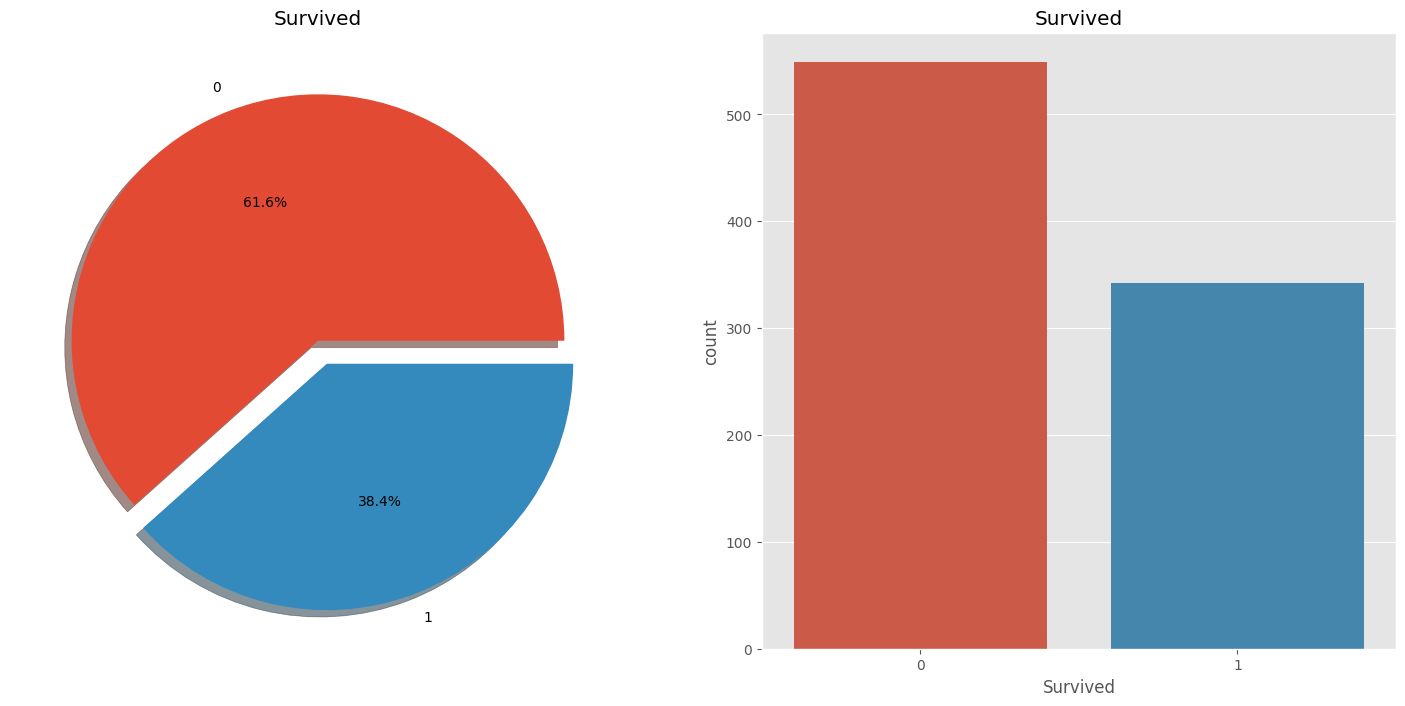

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

data_df['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%0.1f%%', ax=ax[0], shadow=True)

ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=data_df, ax=ax[1])
ax[1].set_title('Survived')

plt.show()

데이터 891개중 61.6% 사망

Categorical Features in the dataset: Sex,Embarked.

Ordinal Features in the dataset: PClass

Continous Features in the dataset: Age





### EDA - (2) Sex

In [11]:
data_df.groupby(['Sex', 'Survived'])['Survived'].count()


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

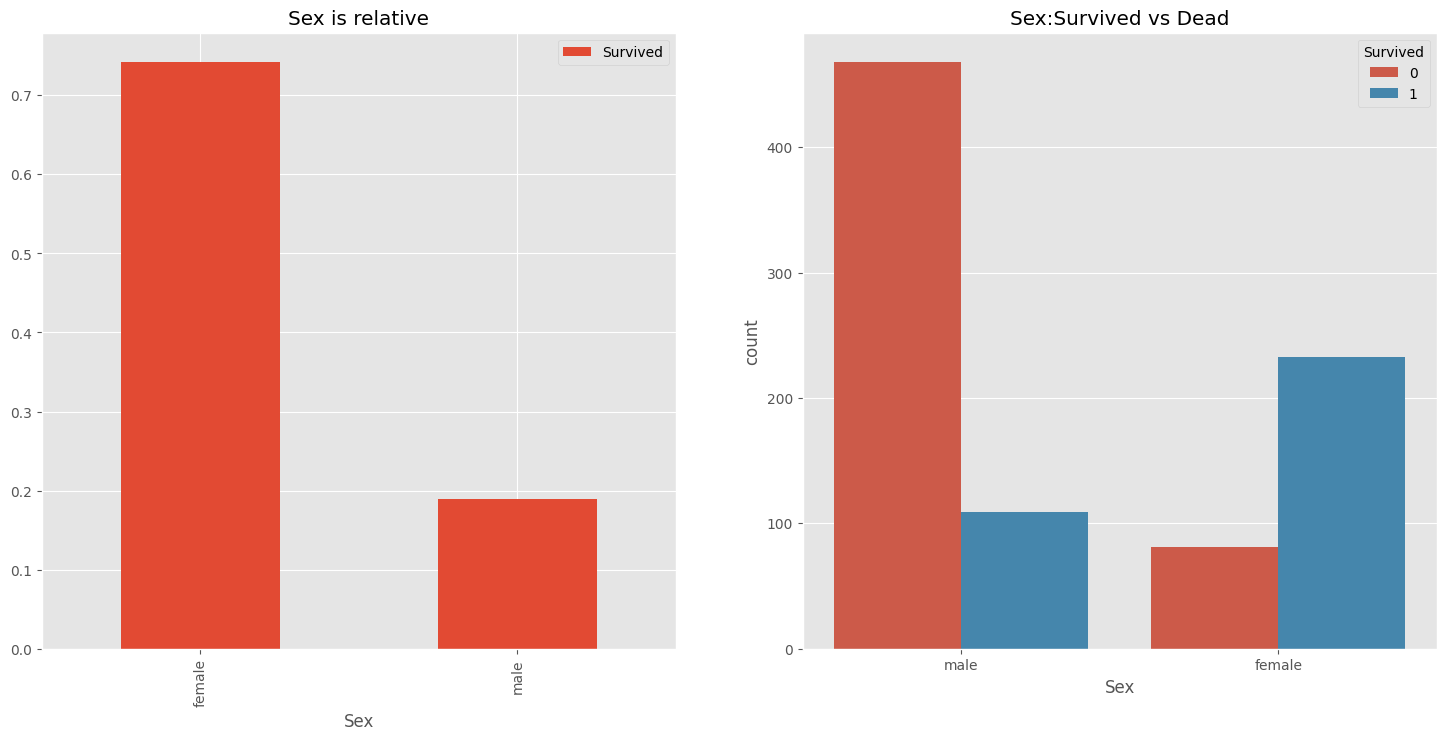

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

data_df[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])

ax[0].set_title('Sex is relative')

sns.countplot('Sex', hue='Survived', data=data_df, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')

plt.show()

남자일때 죽을 확률이 70%가 넘고 여자일 경우 28%정도로 특성이 나타남. 따라서 유효한 데이터

### EDA - (3) PClass (선실등급)

In [13]:
pd.crosstab(data_df.Pclass, data_df.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


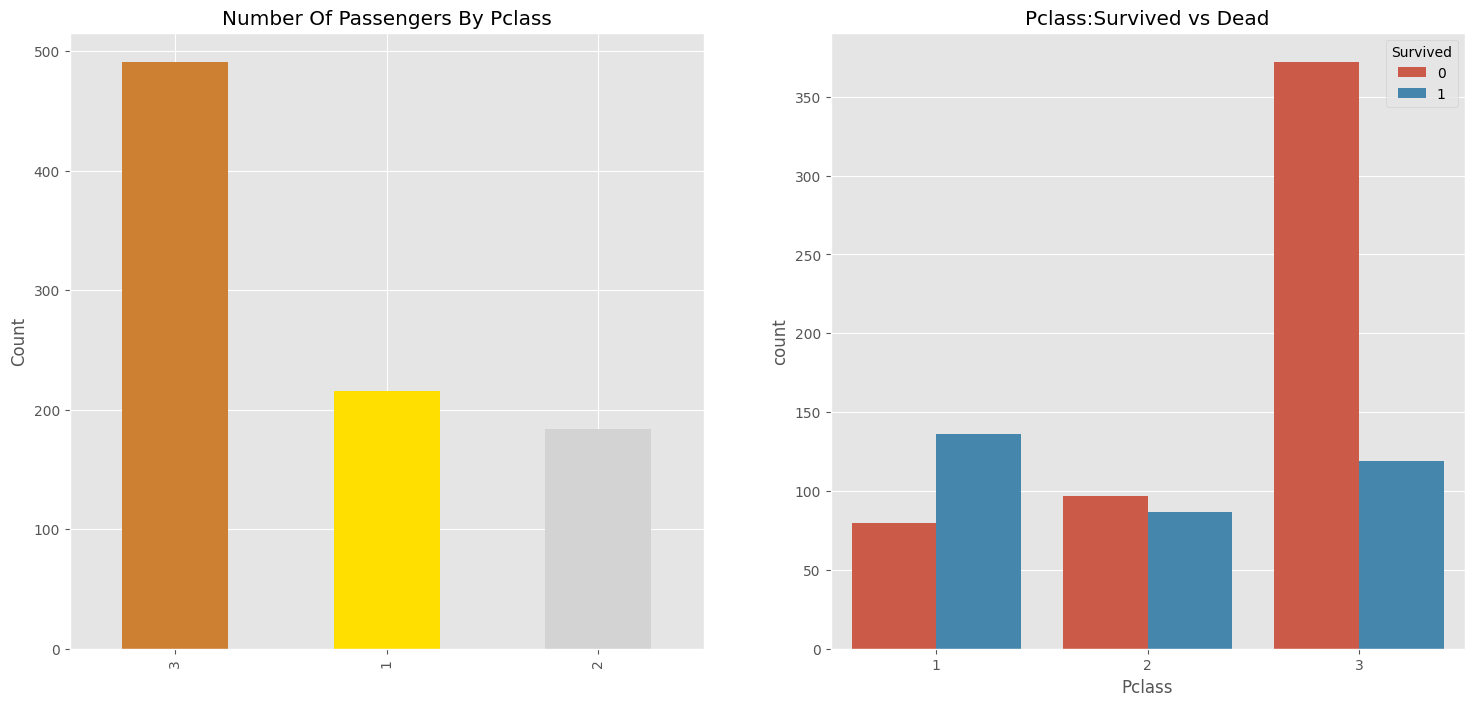

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

data_df['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])

ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=data_df, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')

plt.show()

    1등급일때 생존률이 50%이상이고 3등급이면 생존이 20%정도로 떨어짐으로써 상관관계가 있음

In [15]:
#성별에 따른 생존률
pd.crosstab([data_df.Sex, data_df.Survived], data_df.Pclass, margins=True).style.background_gradient(cmap='summer_r')

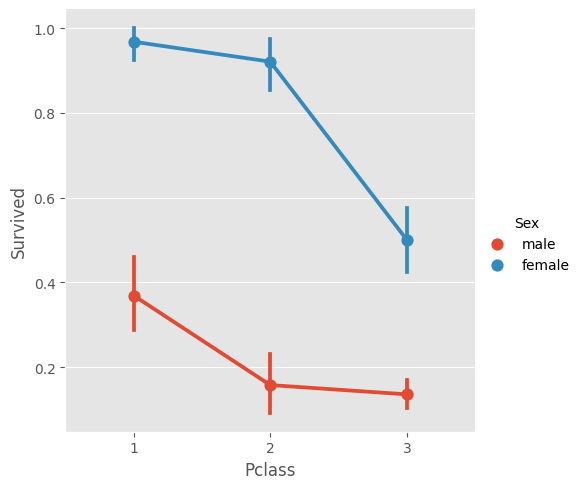

In [16]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data_df)
plt.show()

### EDA - (4) Age

In [17]:
print('제일 늙은사람의 나이:', data_df['Age'].max(), 'Years')
print('제일 어린사람의 나이:', data_df['Age'].min(), 'Years')
print('평균나이 ::', data_df['Age'].mean(), 'Years')


제일 늙은사람의 나이: 80.0 Years
제일 어린사람의 나이: 0.42 Years
평균나이 :: 29.69911764705882 Years


In [18]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot("Pclass", "Age", hue="Survived", data=data_df, split=True, ax=ax[0])
ax[0].set_title('선실 등급과 연령 생존', fontproperties=fprop)
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot("Sex", "Age", hue="Survived", data=data_df, split=True, ax=ax[1])
ax[1].set_title('성별과 연령의 생존', fontproperties=fprop)
ax[1].set_yticks(range(0, 110, 10))
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'E:\\font\\esamanru Medium.ttf'

<Figure size 1800x800 with 2 Axes>

In [19]:
data_df.Age.isnull().sum()

177

Null 값을 예측 모델의 값으로 대체

### EDA - (5) Name

In [20]:
np.count_nonzero(data_df.Name.unique())


891

이름은 다 유니크해서 사용하기 어려움

In [21]:
data_df.Name.head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

호칭을 사용

In [22]:
data_df['Title'] = data_df.Name.str.extract('\s([A-Za-z]+\.)\s') # 호칭 추출 정규표현식


In [23]:
data_df['Title'].value_counts()


Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
Countess.      1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: Title, dtype: int64

In [24]:
pd.crosstab(data_df.Title, data_df.Sex).T.style.background_gradient(cmap='hot_r')  #Checking the Initials with the Sex


Title,Capt.,Col.,Countess.,Don.,Dr.,Jonkheer.,Lady.,Major.,Master.,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


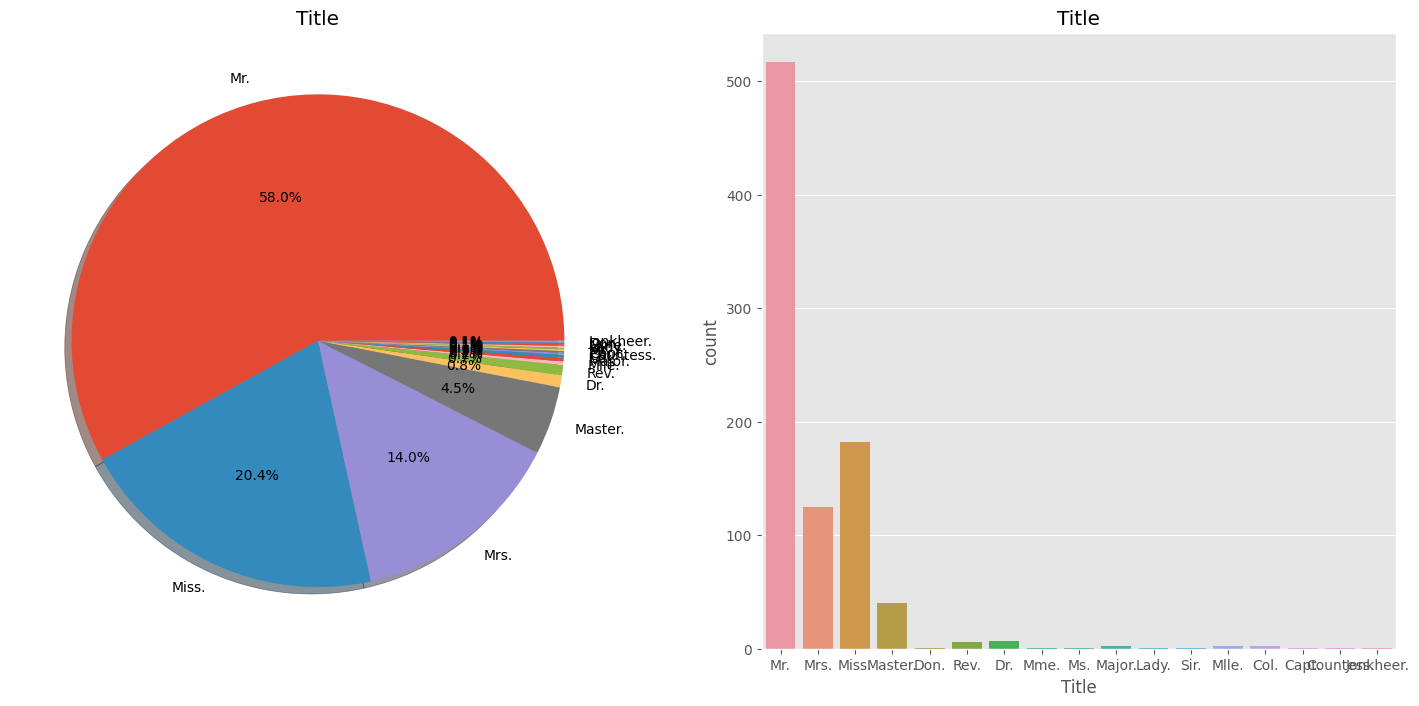

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
data_df['Title'].value_counts().plot.pie(autopct='%0.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Title')
ax[0].set_ylabel('')
sns.countplot('Title', data=data_df, ax=ax[1])
ax[1].set_title('Title')
plt.show()


In [26]:
# Title에 따른 Age의 평균및 수
data_df.groupby('Title').agg({'Age': [np.mean, 'count']})


Age      
                mean count
Title                     
Capt.      70.000000     1
Col.       58.000000     2
Countess.  33.000000     1
Don.       40.000000     1
Dr.        42.000000     6
Jonkheer.  38.000000     1
Lady.      48.000000     1
Major.     48.500000     2
Master.     4.574167    36
Miss.      21.773973   146
Mlle.      24.000000     2
Mme.       24.000000     1
Mr.        32.368090   398
Mrs.       35.898148   108
Ms.        28.000000     1
Rev.       43.166667     6
Sir.       49.000000     1

**칭호 통합을 위한 배경지식**

    Monsieur" (M.) for a man, The plural is Messieurs (MM. for short).

    "Madame" (Mme) for a woman. The plural is Mesdames (Mmes). (= Madame) Mrs

    "Mademoiselle" (Mlle) is a traditional alternative for an unmarried woman. The plural is Mesdemoiselles (Mlles).

    "Lady" is also a formal title in the United Kingdom. "Lady" is used before the family name of a woman with a title of nobility or honorary title suo jure (in her own right), or the wife of a lord, a baronet, Scottish feudal baron, laird, or a knight, and also before the first name of the daughter of a duke, marquess, or earl.


__Name 처리 함수__   
        
        같은 의미를 뜻하는 칭호 통합 및 마이너 칭호 개수가 6이하를 통합

In [27]:
def preprocess_title(title_name):
    title_dict = {
        'Mr.': ['Mr.'],
        'Miss.': ['Ms.', 'Mlle.', 'Miss.'],
        'Mrs.': ['Mrs.', 'Mme.'],
        'etc': ['Rev.', 'Sir.', 'Dr.', 'Capt.', 'Col.', 'Countess.', 'Don.', 'Jonkheer.', 'Lady.', 'Major.'],
        'Master.': ['Master.'],
    }
    for title, list in title_dict.items():
        if title_name in list:
            return title


In [28]:
data_df.Title = data_df.Title.apply(preprocess_title)


In [29]:
data_df.Title.value_counts()


Mr.        517
Miss.      185
Mrs.       126
Master.     40
etc         23
Name: Title, dtype: int64

In [30]:
data_df.drop('Name', inplace=True, axis=1)

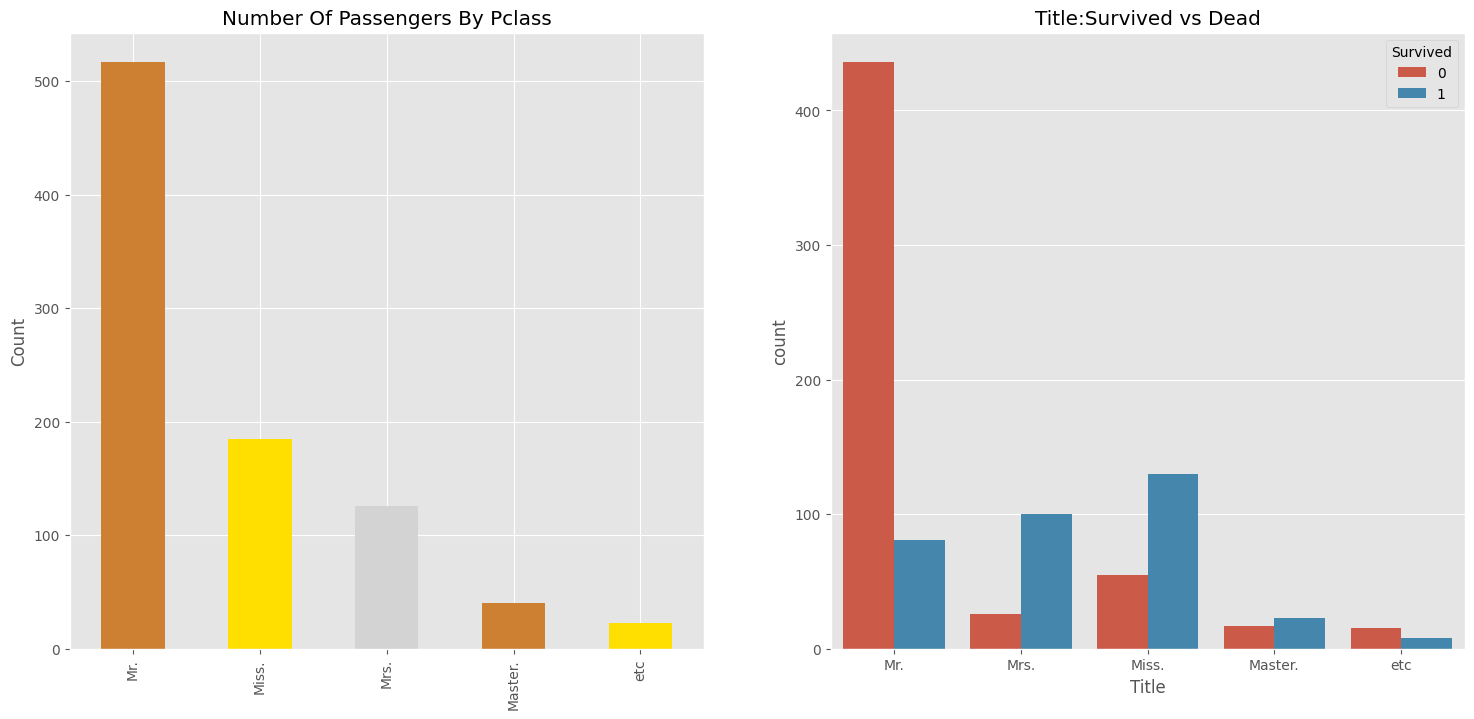

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
data_df['Title'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Title', hue='Survived', data=data_df, ax=ax[1])
ax[1].set_title('Title:Survived vs Dead')
plt.show()

###  EDA - (6) Embarked

<figure>
<center> <img src="./images/embark_image.png"  alt='missing' width="600"  ><center/>
<figure/>


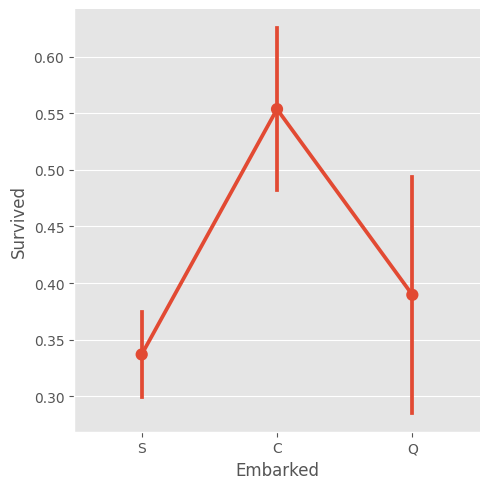

In [32]:
sns.factorplot('Embarked', 'Survived', data=data_df)
fig = plt.gcf()
plt.show()


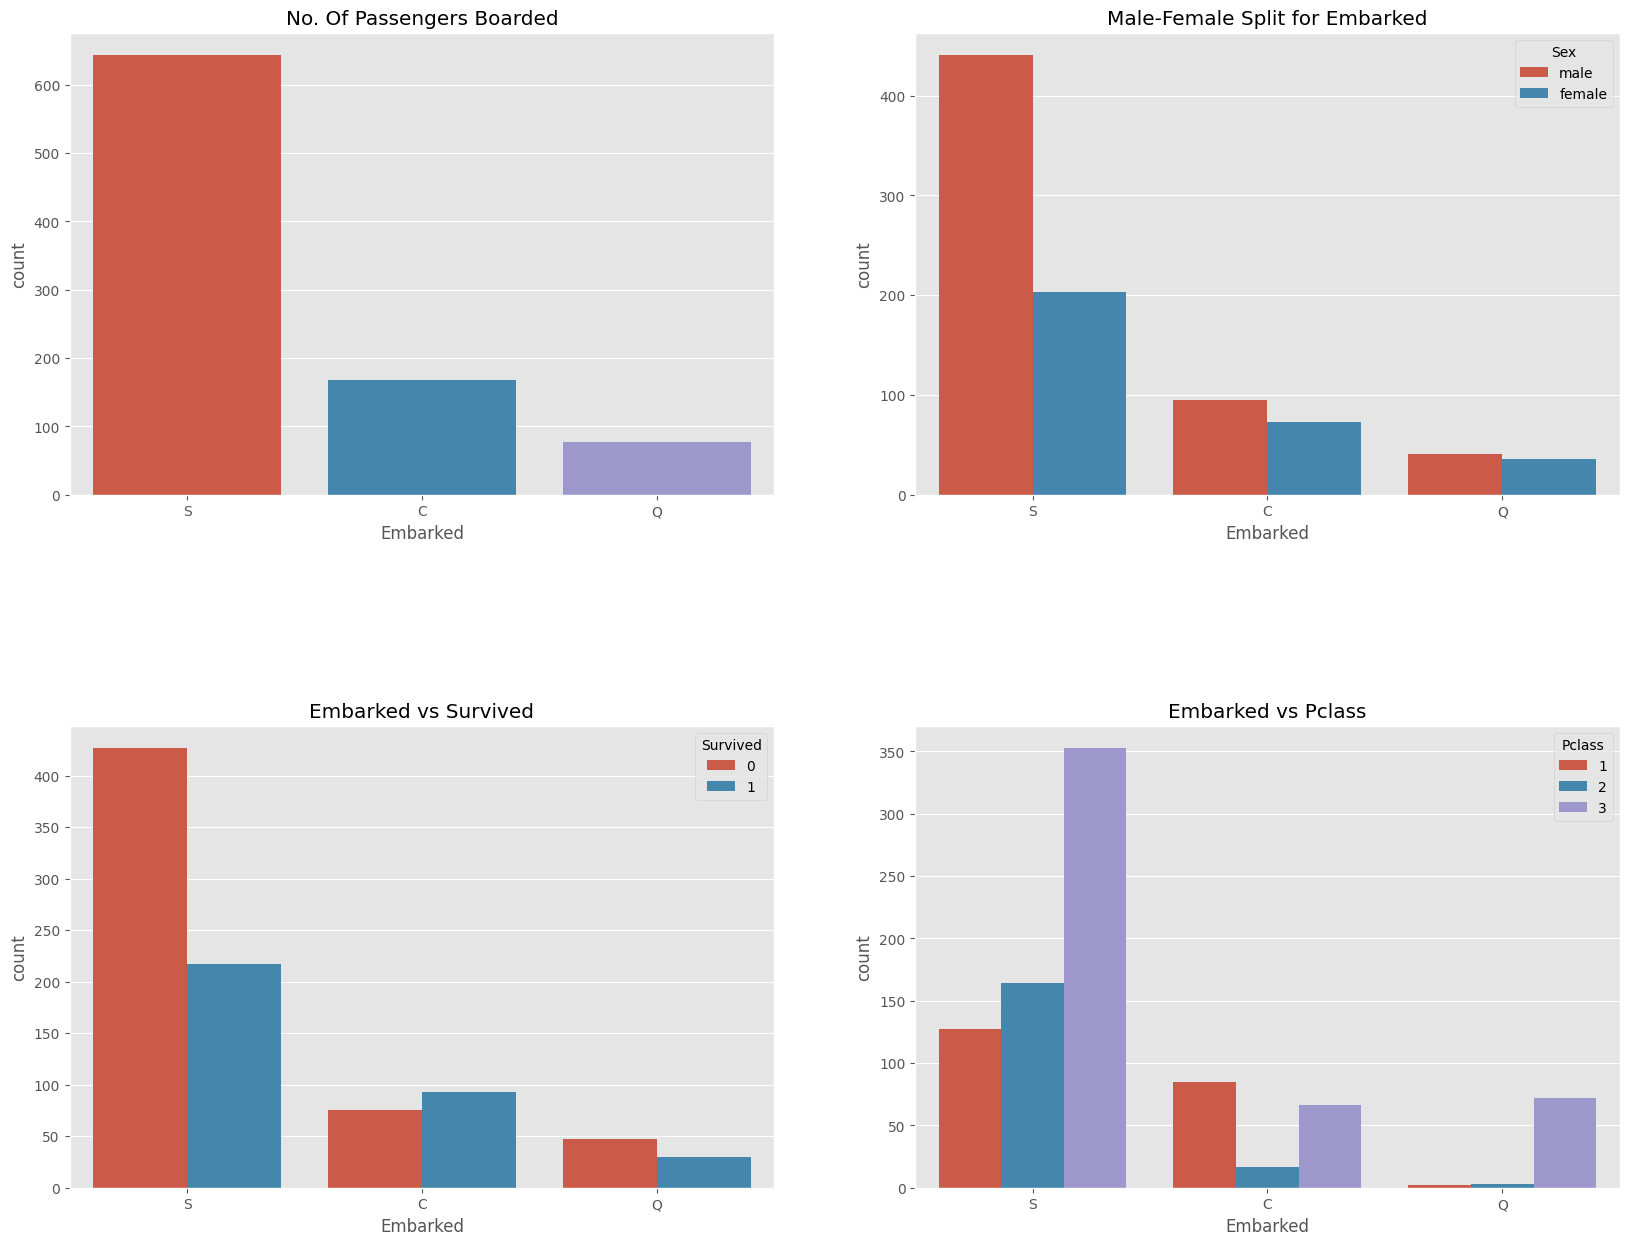

In [33]:
fig, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot('Embarked', data=data_df, ax=ax[0, 0])
ax[0, 0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=data_df, ax=ax[0, 1])
ax[0, 1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=data_df, ax=ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=data_df, ax=ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


In [34]:
data_df.groupby(['Embarked', 'Pclass']).agg({'Fare': [np.mean, np.std, ], })


Fare           
                       mean        std
Embarked Pclass                       
C        1       104.718529  99.093935
         2        25.358335  11.345067
         3        11.214083   4.871528
Q        1        90.000000   0.000000
         2        12.350000   0.000000
         3        11.183393   6.721677
S        1        70.364862  58.811278
         2        20.327439  13.630741
         3        14.644083  13.276609

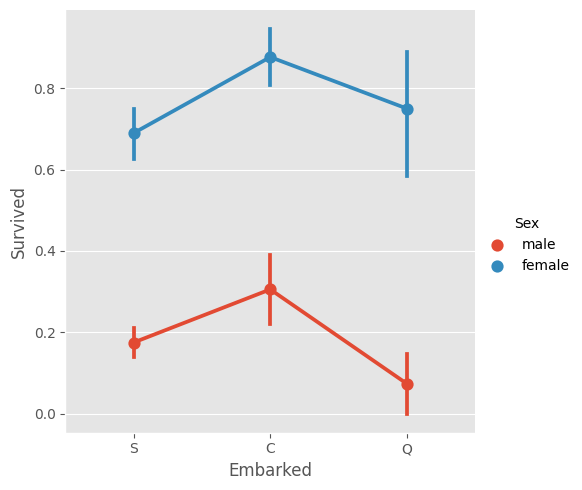

In [35]:
sns.factorplot('Embarked', 'Survived', hue='Sex', data=data_df)
plt.show()


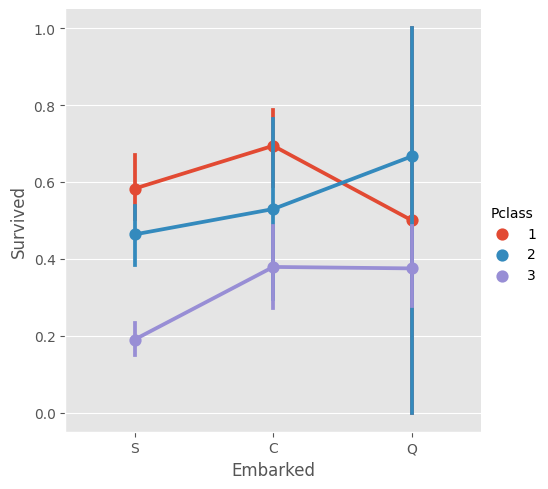

In [36]:
sns.factorplot('Embarked', 'Survived', hue='Pclass', data=data_df)
plt.show()


In [37]:
## Embarked 결측히 확인
data_df[data_df['Embarked'].isnull()]


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
61,62,1,1,female,38.0,0,0,113572,80.0,B28,NaN,Miss.
829,830,1,1,female,62.0,0,0,113572,80.0,B28,NaN,Mrs.


In [38]:
# 최빈값으로 결측치 대체
data_df['Embarked'] = data_df.Embarked.fillna('S')


### EDA - (7) Sibsp

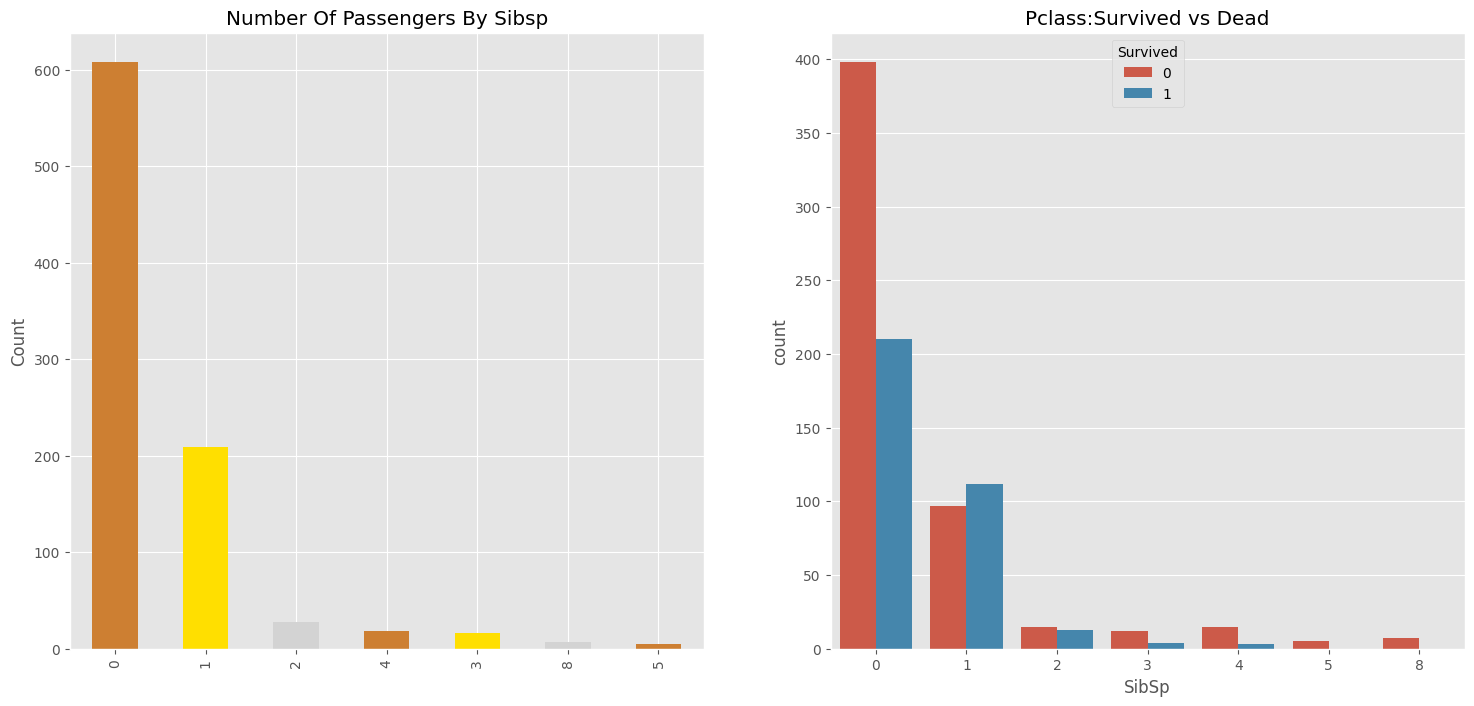

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
data_df['SibSp'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Sibsp')
ax[0].set_ylabel('Count')
sns.countplot('SibSp', hue='Survived', data=data_df, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()


### EDA - (8) Parch

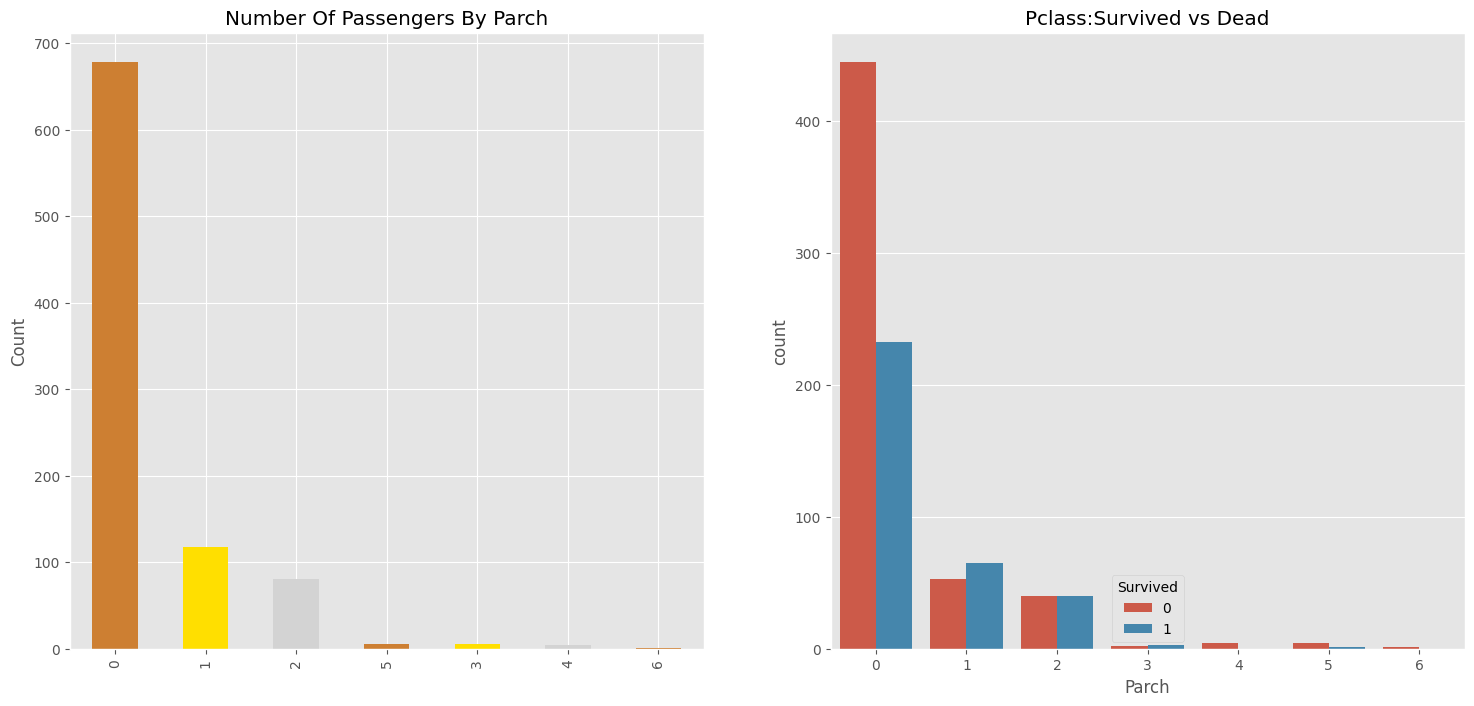

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
data_df['Parch'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Parch')
ax[0].set_ylabel('Count')
sns.countplot('Parch', hue='Survived', data=data_df, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()


### EDA - (9) Ticket

In [41]:
data_df.Ticket.head(10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

### EDA - (10) Cabin

In [42]:
data_df.Cabin.head(10)


0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

In [43]:
data_df.Cabin.isnull().sum()

687

## 2) Data Preprocessing

In [44]:
# 전처리용 라이브러 임포트
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [46]:
# 데이터프레임 백업및 미사용 열 삭제
data_back_df = data_df.copy()
data_df.drop(['PassengerId', 'Cabin', 'Ticket'], inplace=True, axis=1)
data_df_with_survived = data_df.copy()
data_df.drop('Survived', inplace=True, axis=1)


In [47]:
# 테스트용 df
test_df = data_df.copy()


### 2. Data preprocessing - (1) Age예측 데이터 생성

In [48]:
#one Hot encoding col name 유지 하기
#import warnings
from sklearn.base import BaseEstimator


class PassthroughTransformer(BaseEstimator):
    def fit(self, X, y=None):
        self.cols = X.columns
        return self

    def transform(self, X, y=None):
        self.cols = X.columns
        return X.values

    def get_feature_names(self):
        return self.cols


In [49]:
# 카테고리 원핫인코딩 일괄적용

#Categories
exclue_age_numeric_features = ['SibSp', 'Parch', 'Fare', ]
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare', ]
categorical_features = ['Pclass', 'Sex', 'Embarked', 'Title']

#Model
numeric_transformer = MinMaxScaler()  # cf) RobustScaler
categorical_transformer = OneHotEncoder(sparse=False, handle_unknown='ignore')

#전처리 파이프라인
categori_preprocessor = ColumnTransformer(
    [('cat', categorical_transformer, categorical_features),
     ('numeri', numeric_transformer, exclue_age_numeric_features)],
    remainder='passthrough'
)


In [50]:
age_test_df = test_df[test_df['Age'].isnull()]
age_train_df = test_df[~test_df['Age'].isnull()]


In [51]:
#원핫 인코딩후 반환
categori_preprocessor.fit(age_train_df)
trans_age_train_df = categori_preprocessor.transform(age_train_df)
trans_age_null_df = categori_preprocessor.transform(age_test_df)

# 컬럼 내용 처리
tx = categori_preprocessor.get_params()['transformers']

feature_names = []
for name, transformer, features in tx:
    try:
        Var = categori_preprocessor.named_transformers_[name].get_feature_names().tolist()
    except AttributeError:
        Var = features
    feature_names = feature_names + Var

In [53]:
#데이터 프레임으로 반환
trans_age_train_df = pd.DataFrame(trans_age_train_df, columns=feature_names + ['Age'])  # passthrough한 feature 열이름 추가
trans_age_null_df = pd.DataFrame(trans_age_null_df, columns=feature_names + ['Age'])  # passthrough한 feature 열이름 추가


In [54]:
trans_age_train_df_x = trans_age_train_df.drop('Age', axis=1)
trans_age_train_df_y = trans_age_train_df['Age']

trans_age_null_df_x = trans_age_null_df.drop('Age', axis=1)


In [55]:
trans_age_train_df_x = trans_age_train_df.drop('Age', axis=1)
trans_age_train_df_y = trans_age_train_df['Age']

trans_age_null_df_x = trans_age_null_df.drop('Age', axis=1)


### 2. Data preprocessing -  (2) Age 예측

In [58]:
# Model들 import
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor


In [59]:
# 모델선언
LinearModel = LinearRegression()
LassoModel = Lasso(alpha=1)
RidgeModel = Ridge(alpha=0.1)
xgbrModel = XGBRegressor()

#테스트 셋 분할
age_X_train, age_X_test, age_y_train, age_y_test = train_test_split(trans_age_train_df_x, trans_age_train_df_y,
                                                                    random_state=5441)


In [60]:
#모델 훈련 
LinearModel.fit(age_X_train, age_y_train)
LassoModel.fit(age_X_train, age_y_train)
RidgeModel.fit(age_X_train, age_y_train)
xgbrModel.fit(age_X_train, age_y_train)
#모델 테스트 
print("Linear Model")
print("훈련 세트 점수: {:.3f}".format(LinearModel.score(age_X_train, age_y_train)))
print("테스트 세트 점수: {:.3f}".format(LinearModel.score(age_X_test, age_y_test)))

#과적합을 막는 모델이라서 데이터가 적은곳에서는 사용하기 어려움
print("Lasso Model")
print("훈련 세트 점수: {:.3f}".format(LassoModel.score(age_X_train, age_y_train)))
print("테스트 세트 점수: {:.3f}".format(LassoModel.score(age_X_test, age_y_test)))

print("Ridge Model")
print("훈련 세트 점수: {:.3f}".format(RidgeModel.score(age_X_train, age_y_train)))
print("테스트 세트 점수: {:.3f}".format(RidgeModel.score(age_X_test, age_y_test)))

print("XGB Regressor")
print("훈련 세트 점수: {:.3f}".format(xgbrModel.score(age_X_train, age_y_train)))
print("테스트 세트 점수: {:.3f}".format(xgbrModel.score(age_X_test, age_y_test)))

# R^2 의미


Linear Model
훈련 세트 점수: 0.433
테스트 세트 점수: 0.376
Lasso Model
훈련 세트 점수: 0.229
테스트 세트 점수: 0.234
Ridge Model
훈련 세트 점수: 0.433
테스트 세트 점수: 0.381
XGB Regressor
훈련 세트 점수: 0.794
테스트 세트 점수: 0.230


__MSE가 아닌 R^2를 사용한 이유__
??

In [63]:
# 리니어 모델 weight값과 bias
linear_wb = pd.DataFrame(LinearModel.coef_, index=feature_names).T
linear_wb['bias'] = LinearModel.intercept_
linear_wb


,x0_1,x0_2,x0_3,x1_female,x1_male,x2_C,x2_Q,x2_S,x3_Master.,x3_Miss.,x3_Mr.,x3_Mrs.,x3_etc,SibSp,Parch,Fare,bias
0,-1.168930e+14,-1.168930e+14,-1.168930e+14,6.559494e+13,6.559494e+13,-3.425673e+12,-3.425673e+12,-3.425673e+12,-1.996321e+14,-1.996321e+14,-1.996321e+14,-1.996321e+14,-1.996321e+14,-10.756836,-0.513466,-6.488281,2.543559e+14


In [64]:
# 릿지 모델 weight값과 bias
ridge_wb = pd.DataFrame(RidgeModel.coef_, index=feature_names).T
ridge_wb['bias'] = RidgeModel.intercept_
ridge_wb


,x0_1,x0_2,x0_3,x1_female,x1_male,x2_C,x2_Q,x2_S,x3_Master.,x3_Miss.,x3_Mr.,x3_Mrs.,x3_etc,SibSp,Parch,Fare,bias
0,7.930516,-2.006537,-5.923979,-7.236356,7.236356,-4.186472,5.421211,-1.234739,-24.224624,2.399121,-0.887692,16.485948,6.227247,-10.702737,-0.381321,-6.511409,31.024839


**모델의 w,b값을 확인결과 x3_Master의 가중치가 -인 RidgeModel이 더 합리적이라서 Ridge 모델을 Age예측에 채택**

In [65]:
data_df_with_survived.loc[data_df_with_survived['Age'].isna(), 'Age'] = np.round(
    RidgeModel.predict(trans_age_null_df_x), 0)


In [66]:
data_df_with_survived.to_csv('no_na_titanic_df.csv')


In [67]:
data_df_with_survived.isna().sum()


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

- - -
# 3. Train - Test split

(비율을 7:3 으로 유지해주시고, seed는 0을 적용해주세요)
- - -

In [68]:
titan_df = pd.read_csv('no_na_titanic_df.csv')

In [69]:
titan_df.drop('Unnamed: 0', inplace=True, axis=1)

In [70]:
titanic_x = titan_df.drop('Survived', axis=1)
titanic_y = titan_df['Survived']

### 3. Train-Test split - 1) split (7:3, seed =0)


In [71]:
#Training, Test Data Set 분리
titanic_train_x, titanic_test_x, titanic_train_y, titanic_test_y = train_test_split(titanic_x, titanic_y,
                                                                                    random_state=0, test_size=0.3)

### 3 Train-Test split - 2) 원핫 인코딩, 스케일러 적용

__>> comment: Standard scaler, Min-Max scaler 둘 다 적용해보고 성능이 좋은 걸로 사용하자.__

In [74]:
# 카테고리 원핫인코딩 일괄적용 

#Categories
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare', ]
categorical_features = ['Pclass', 'Sex', 'Embarked', 'Title']

#Model 
numeric_transformer = MinMaxScaler()  # cf) RobustScaler
categorical_transformer = OneHotEncoder(sparse=False, handle_unknown='ignore')

#전처리 파이프라인
preprocessor_pipe = ColumnTransformer(
    [('cat', categorical_transformer, categorical_features),
     ('numeri', numeric_transformer, numeric_features)],
    remainder='passthrough'
)


In [75]:
preprocessor_pipe.fit(titanic_train_x)
transform_train_x = preprocessor_pipe.transform(titanic_train_x)
transform_test_x = preprocessor_pipe.transform(titanic_test_x)


In [76]:
# feature_name 복구 
tx = preprocessor_pipe.get_params()['transformers']

feature_names = []
for name, transformer, features in tx:
    try:
        Var = preprocessor_pipe.named_transformers_[name].get_feature_names().tolist()
    except AttributeError:
        Var = features
    feature_names = feature_names + Var


- - -
# 4. Create Model Instance Variable & Train Model
(동시에 여러 모델을 다른 이름으로 만들 수 있습니다.)
- - -

### 4. Modeling - 1) Logistic Regression

In [118]:
# Model 생성
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import pickle
import joblib



In [79]:
#하이퍼 파라미터 조정전 
logistic_model = LogisticRegression(C=1, max_iter=10000, random_state=77)
logistic_model.fit(transform_train_x, titanic_train_y)
logistic_model.score(transform_train_x, titanic_train_y), logistic_model.score(transform_test_x, titanic_test_y)


(0.8330658105939005, 0.8134328358208955)

In [80]:
# # Hyper 파라미터 조정 자동화 
# # C-Value 정규화(오버 피팅 방지) 값이 낮을수록 강해짐
# logistc_c_dicts = {
#     'c': [],
#     'train_acc': [],
#     'test_acc': [],
# }
# for i in np.arange(0.01, 40, 0.1):
#     logistic_model = LogisticRegression(C=i, max_iter=10000, random_state=77)
#     logistic_model.fit(transform_train_x, titanic_train_y)
#     logistc_c_dicts['c'].append(i)
#     logistc_c_dicts['train_acc'].append(logistic_model.score(transform_train_x, titanic_train_y))
#     logistc_c_dicts['test_acc'].append(logistic_model.score(transform_test_x, titanic_test_y))


In [140]:
# #Pickle 파일로 저장
# with open('logistc_c_dicts.pickle', 'wb') as f :
#     pickle.dump(logistc_c_dicts,f)

In [144]:
#이미 학습시킨 데이터 오픈
with open('logistc_c_dicts.pickle', 'rb') as f :
    logistc_c_dicts = pickle.load(f)

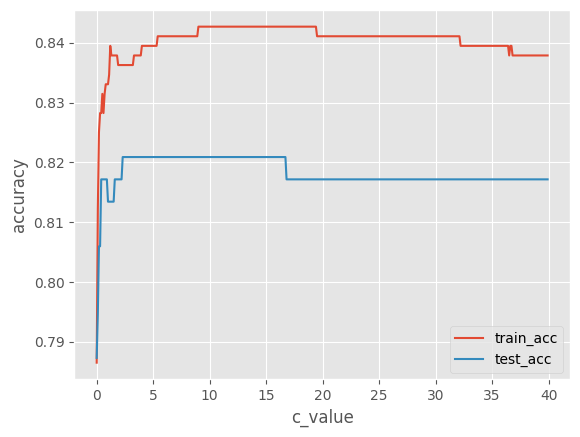

In [145]:
#하이퍼 파라미터 확인 
plt.plot(logistc_c_dicts['c'], logistc_c_dicts['train_acc'])
plt.plot(logistc_c_dicts['c'], logistc_c_dicts['test_acc'])
logistc_c_df = pd.DataFrame(logistc_c_dicts)
plt.legend(['train_acc', 'test_acc'])
plt.xlabel('c_value')
plt.ylabel('accuracy')
plt.show()


In [82]:
#최적의 c값 확인
logistc_c_df.sort_values(by=['test_acc', 'train_acc'], ascending=False).head(5)


,c,train_acc,test_acc
90,9.01,0.842697,0.820896
91,9.11,0.842697,0.820896
92,9.21,0.842697,0.820896
93,9.31,0.842697,0.820896
94,9.41,0.842697,0.820896


<AxesSubplot:>

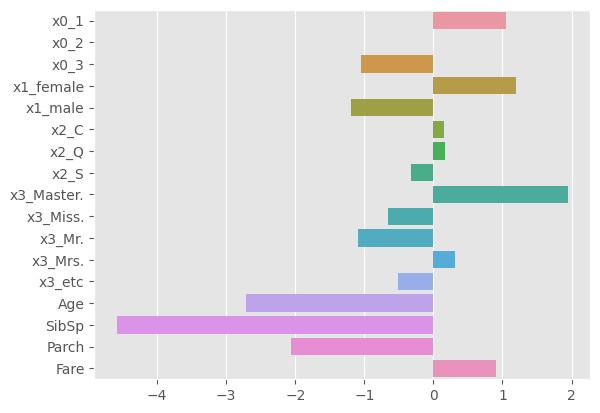

In [83]:
#Weight 값 확인
logistic_model = LogisticRegression(C=9.01, max_iter=10000, random_state=77)
logistic_model.fit(transform_train_x, titanic_train_y)
sns.barplot(x=logistic_model.coef_.ravel().tolist(), y=feature_names)


### 4. Modeling - 2) Decision Tree

In [84]:
from sklearn.tree import DecisionTreeClassifier


In [85]:
decision_model = DecisionTreeClassifier(random_state=77)


In [86]:
#과적합
decision_model.fit(transform_train_x, titanic_train_y)
decision_model.score(transform_train_x, titanic_train_y), decision_model.score(transform_test_x, titanic_test_y)


(0.9791332263242376, 0.7873134328358209)

In [87]:
#최적의 깊이 탐색 
decision_dep_dicts = {
    'dep': [],
    'train_acc': [],
    'test_acc': [],
}
for num in range(1, 20):
    decision_model = DecisionTreeClassifier(max_depth=num, random_state=77)
    decision_model.fit(transform_train_x, titanic_train_y)
    decision_dep_dicts['dep'].append(num)
    decision_dep_dicts['train_acc'].append(decision_model.score(transform_train_x, titanic_train_y))
    decision_dep_dicts['test_acc'].append(decision_model.score(transform_test_x, titanic_test_y))


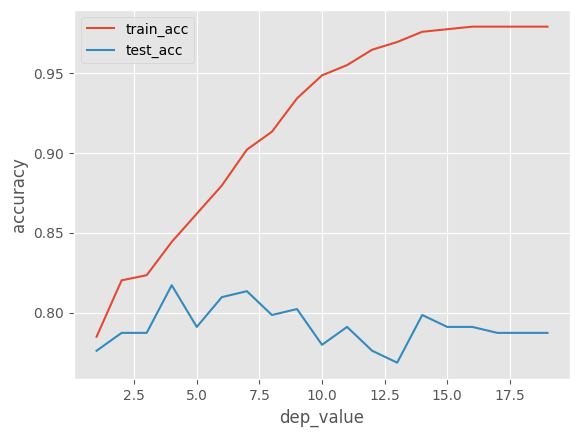

In [88]:
plt.plot(decision_dep_dicts['dep'], decision_dep_dicts['train_acc'])
plt.plot(decision_dep_dicts['dep'], decision_dep_dicts['test_acc'])
decision_dep_df = pd.DataFrame(decision_dep_dicts)
plt.legend(['train_acc', 'test_acc'])
plt.xlabel('dep_value')
plt.ylabel('accuracy')
plt.show()


In [89]:
decision_dep_df.sort_values(by=['test_acc', 'train_acc'], ascending=False).head(5)
# 4일때 최적의 깊이를 알 수 있음


,dep,train_acc,test_acc
3,4,0.844302,0.817164
6,7,0.902087,0.813433
5,6,0.879615,0.809701
8,9,0.934189,0.802239
13,14,0.975923,0.798507


In [93]:
#피쳐의 수
len(feature_names)
 

17

In [91]:
#최적의 최대 피쳐수
decision_mf_dicts = {
    'mf': [],
    'train_acc': [],
    'test_acc': [],
}
for num in range(2, len(feature_names) + 1):
    decision_model = DecisionTreeClassifier(max_depth=4, random_state=77, max_features=num)
    decision_model.fit(transform_train_x, titanic_train_y)
    decision_mf_dicts['mf'].append(num)
    decision_mf_dicts['train_acc'].append(decision_model.score(transform_train_x, titanic_train_y))
    decision_mf_dicts['test_acc'].append(decision_model.score(transform_test_x, titanic_test_y))


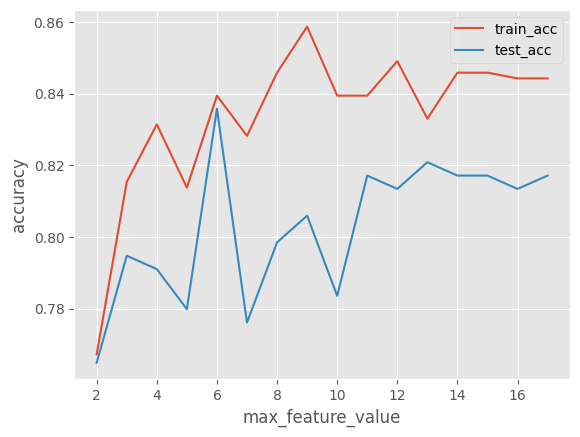

In [92]:
plt.plot(decision_mf_dicts['mf'], decision_mf_dicts['train_acc'])
plt.plot(decision_mf_dicts['mf'], decision_mf_dicts['test_acc'])
decision_mf_df = pd.DataFrame(decision_mf_dicts)
plt.legend(['train_acc', 'test_acc'])
plt.xlabel('max_feature_value')
plt.ylabel('accuracy')
plt.show()


In [94]:
decision_mf_df.sort_values(by=['test_acc', 'train_acc'], ascending=False).head(5)


,mf,train_acc,test_acc
4,6,0.839486,0.835821
11,13,0.833066,0.820896
12,14,0.845907,0.817164
13,15,0.845907,0.817164
15,17,0.844302,0.817164


In [95]:
#최적의 최대 피쳐수
decision_min_leaf_dicts = {
    'ml': [],
    'train_acc': [],
    'test_acc': [],
}
for num in range(1, 7):
    decision_model = DecisionTreeClassifier(max_depth=4, random_state=77, max_features=6, min_samples_leaf=num)
    decision_model.fit(transform_train_x, titanic_train_y)
    decision_min_leaf_dicts['ml'].append(num)
    decision_min_leaf_dicts['train_acc'].append(decision_model.score(transform_train_x, titanic_train_y))
    decision_min_leaf_dicts['test_acc'].append(decision_model.score(transform_test_x, titanic_test_y))


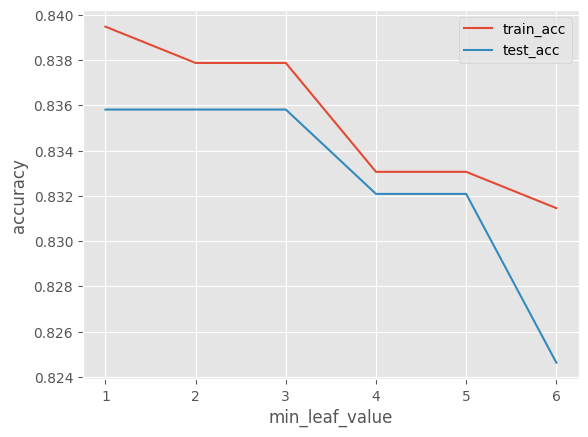

In [96]:
plt.plot(decision_min_leaf_dicts['ml'], decision_min_leaf_dicts['train_acc'])
plt.plot(decision_min_leaf_dicts['ml'], decision_min_leaf_dicts['test_acc'])
decision_min_leaf_df = pd.DataFrame(decision_min_leaf_dicts)
plt.legend(['train_acc', 'test_acc'])
plt.xlabel('min_leaf_value')
plt.ylabel('accuracy')
plt.show()


In [97]:
decision_min_leaf_df.sort_values(by=['test_acc', 'train_acc'], ascending=False).head(5)


,ml,train_acc,test_acc
0,1,0.839486,0.835821
1,2,0.837881,0.835821
2,3,0.837881,0.835821
3,4,0.833066,0.832090
4,5,0.833066,0.832090


In [98]:
decision_params_dics = {'max_depth': [4, 7, 6, 9, 14],
                        'random_state': [77],
                        'max_features': [6, 13, 14, 15, 17],
                        'min_samples_leaf': [1, 2, 3, 4, 5],
                        'min_samples_split': [1.0, 2, 3, 4, 5, 6],
                        }
decision_grid = GridSearchCV(DecisionTreeClassifier(), param_grid=decision_params_dics, cv=5, scoring='accuracy',
                             refit=True)


In [100]:
decision_grid.fit(transform_train_x, titanic_train_y)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 7, 6, 9, 14],
                         'max_features': [6, 13, 14, 15, 17],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1.0, 2, 3, 4, 5, 6],
                         'random_state': [77]},
             scoring='accuracy')

In [101]:
decision_grid.best_estimator_.get_params


<bound method BaseEstimator.get_params of DecisionTreeClassifier(max_depth=4, max_features=6, random_state=77)>

In [102]:
decision_grid.best_estimator_.score(transform_train_x, titanic_train_y)
decision_grid.best_estimator_.score(transform_test_x, titanic_test_y)


0.835820895522388

<AxesSubplot:>

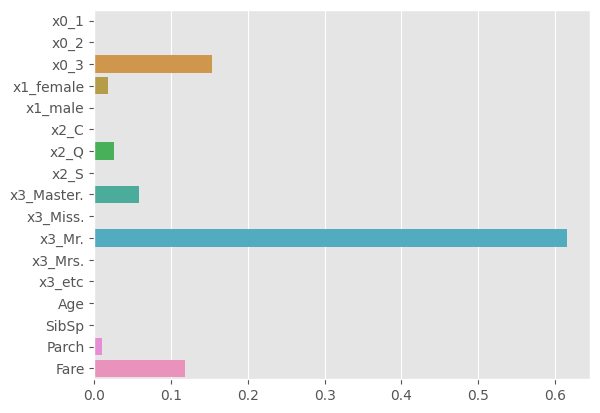

In [103]:
decision_model = DecisionTreeClassifier(max_depth=4, random_state=77, max_features=6)
decision_model.fit(transform_train_x, titanic_train_y)

# # 특성의 중요도 표시 1일수록 중요
# for name, value in zip(feature_names, decision_model.feature_importances_):
#     print(f'{name} : {np.round(value,3)}')

sns.barplot(x=decision_model.feature_importances_, y=feature_names)


### 4. Modeling - 3) SVM

In [105]:
from sklearn import svm


In [106]:
svm_clf = svm.SVC(kernel="linear", C=1, gamma=0.1, random_state=77)
svm_clf.fit(transform_train_x, titanic_train_y)


SVC(C=1, gamma=0.1, kernel='linear', random_state=77)

In [107]:
svm_clf.score(transform_train_x, titanic_train_y), svm_clf.score(transform_test_x, titanic_test_y)


(0.8330658105939005, 0.8171641791044776)

In [108]:
svm_linear_params = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear'],
    'random_state': [77],
    'probability': [True],
}


In [149]:
# Fit 시간이 오래걸림
# svm_linear = GridSearchCV(svm.SVC(), svm_linear_params, cv=5, scoring='accuracy', refit=True)

# svm_linear.fit(transform_train_x, titanic_train_y)


In [150]:
# #save your model or results
# joblib.dump(svm_linear, 'svm_linear.pkl')

['svm_linear.pkl']

In [151]:
#load your model for further usage
svm_linear = joblib.load("svm_linear.pkl")


In [110]:
svm_linear.best_estimator_, svm_linear.score(transform_test_x, titanic_test_y)
# Best Param
# {'C': 3.8000000000000003, 'gamma': 0.4}


(SVC(C=10, gamma=1, kernel='linear', probability=True, random_state=77),
 0.8171641791044776)

In [111]:
svm_linear.score(transform_train_x, titanic_train_y), svm_linear.score(transform_test_x, titanic_test_y)


(0.8378812199036918, 0.8171641791044776)

In [112]:
c_values = np.arange(9, 20, 0.1).tolist()
svm_rbf_params = {
    'C': [0.1, 1, 100, 1000] + c_values,
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf'],
    'random_state': [77],
    'probability': [True],

}


In [113]:
# svm_rbf = GridSearchCV(svm.SVC(), svm_rbf_params, cv=5, scoring='accuracy', refit=True, verbose=2)
# svm_rbf.fit(transform_train_x, titanic_train_y)


Fitting 5 folds for each of 570 candidates, totalling 2850 fits
[CV 1/5; 1/570] START C=0.1, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 1/5; 1/570] END C=0.1, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.800 total time=   0.0s
[CV 2/5; 1/570] START C=0.1, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 2/5; 1/570] END C=0.1, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.848 total time=   0.0s
[CV 3/5; 1/570] START C=0.1, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 3/5; 1/570] END C=0.1, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.800 total time=   0.0s
[CV 4/5; 1/570] START C=0.1, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 4/5; 1/570] END C=0.1, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.782 total time=   0.0s
[CV 5/5; 1/570] START C=0.1, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 5/5; 1/570] END C=0.1, gamma=1, kernel=rbf, probabil

[CV 3/5; 9/570] END C=1, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.616 total time=   0.0s
[CV 4/5; 9/570] START C=1, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 4/5; 9/570] END C=1, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.613 total time=   0.0s
[CV 5/5; 9/570] START C=1, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 5/5; 9/570] END C=1, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.613 total time=   0.0s
[CV 1/5; 10/570] START C=1, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 1/5; 10/570] END C=1, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.608 total time=   0.0s
[CV 2/5; 10/570] START C=1, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 2/5; 10/570] END C=1, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.608 total time=   0.0s
[CV 3/5; 10/570] START C=1, gamma=0.0001, kernel=rbf, probabili

[CV 3/5; 17/570] END C=1000, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.832 total time=   0.0s
[CV 4/5; 17/570] START C=1000, gamma=0.1, kernel=rbf, probability=True, random_state=77
[CV 4/5; 17/570] END C=1000, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.790 total time=   0.0s
[CV 5/5; 17/570] START C=1000, gamma=0.1, kernel=rbf, probability=True, random_state=77
[CV 5/5; 17/570] END C=1000, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.831 total time=   0.0s
[CV 1/5; 18/570] START C=1000, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 1/5; 18/570] END C=1000, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.816 total time=   0.0s
[CV 2/5; 18/570] START C=1000, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 2/5; 18/570] END C=1000, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.856 total time=   0.0s
[CV 3/5; 18/570] START C=1000, gamma=0.01, kernel

[CV 1/5; 26/570] END C=9.1, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.832 total time=   0.0s
[CV 2/5; 26/570] START C=9.1, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 2/5; 26/570] END C=9.1, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.864 total time=   0.0s
[CV 3/5; 26/570] START C=9.1, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 3/5; 26/570] END C=9.1, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.824 total time=   0.0s
[CV 4/5; 26/570] START C=9.1, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 4/5; 26/570] END C=9.1, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.798 total time=   0.0s
[CV 5/5; 26/570] START C=9.1, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 5/5; 26/570] END C=9.1, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.847 total time=   0.0s
[CV 1/5; 27/570] START C=9.1, gamma=0.1, kernel=rbf, probability=True, random_st

[CV 1/5; 35/570] END C=9.2, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.608 total time=   0.0s
[CV 2/5; 35/570] START C=9.2, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 2/5; 35/570] END C=9.2, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.608 total time=   0.0s
[CV 3/5; 35/570] START C=9.2, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 3/5; 35/570] END C=9.2, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.616 total time=   0.0s
[CV 4/5; 35/570] START C=9.2, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 4/5; 35/570] END C=9.2, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.613 total time=   0.0s
[CV 5/5; 35/570] START C=9.2, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 5/5; 35/570] END C=9.2, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.613 total time=   0.0s
[CV 1/5; 36/570] START C=9.29999999

[CV 5/5; 42/570] END C=9.399999999999999, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.863 total time=   0.0s
[CV 1/5; 43/570] START C=9.399999999999999, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 1/5; 43/570] END C=9.399999999999999, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.776 total time=   0.0s
[CV 2/5; 43/570] START C=9.399999999999999, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 2/5; 43/570] END C=9.399999999999999, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.808 total time=   0.0s
[CV 3/5; 43/570] START C=9.399999999999999, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 3/5; 43/570] END C=9.399999999999999, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.768 total time=   0.0s
[CV 4/5; 43/570] START C=9.399999999999999, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 4/5; 43/570] END C=9.399999999999999, gamma=0.01, kernel=

[CV 3/5; 50/570] END C=9.499999999999998, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.616 total time=   0.0s
[CV 4/5; 50/570] START C=9.499999999999998, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 4/5; 50/570] END C=9.499999999999998, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.613 total time=   0.0s
[CV 5/5; 50/570] START C=9.499999999999998, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 5/5; 50/570] END C=9.499999999999998, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.613 total time=   0.0s
[CV 1/5; 51/570] START C=9.599999999999998, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 1/5; 51/570] END C=9.599999999999998, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.832 total time=   0.0s
[CV 2/5; 51/570] START C=9.599999999999998, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 2/5; 51/570] END C=9.599999999999998, gamma=1, kernel=r

[CV 1/5; 58/570] END C=9.699999999999998, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.776 total time=   0.0s
[CV 2/5; 58/570] START C=9.699999999999998, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 2/5; 58/570] END C=9.699999999999998, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.808 total time=   0.0s
[CV 3/5; 58/570] START C=9.699999999999998, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 3/5; 58/570] END C=9.699999999999998, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.768 total time=   0.0s
[CV 4/5; 58/570] START C=9.699999999999998, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 4/5; 58/570] END C=9.699999999999998, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.815 total time=   0.0s
[CV 5/5; 58/570] START C=9.699999999999998, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 5/5; 58/570] END C=9.699999999999998, gamma=0.01, kernel

[CV 2/5; 65/570] END C=9.799999999999997, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.608 total time=   0.0s
[CV 3/5; 65/570] START C=9.799999999999997, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 3/5; 65/570] END C=9.799999999999997, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.616 total time=   0.0s
[CV 4/5; 65/570] START C=9.799999999999997, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 4/5; 65/570] END C=9.799999999999997, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.613 total time=   0.0s
[CV 5/5; 65/570] START C=9.799999999999997, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 5/5; 65/570] END C=9.799999999999997, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.613 total time=   0.0s
[CV 1/5; 66/570] START C=9.899999999999997, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 1/5; 66/570] END C=9.899999999999997, gamma=1

[CV 1/5; 73/570] END C=9.999999999999996, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.776 total time=   0.0s
[CV 2/5; 73/570] START C=9.999999999999996, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 2/5; 73/570] END C=9.999999999999996, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.808 total time=   0.0s
[CV 3/5; 73/570] START C=9.999999999999996, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 3/5; 73/570] END C=9.999999999999996, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.768 total time=   0.0s
[CV 4/5; 73/570] START C=9.999999999999996, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 4/5; 73/570] END C=9.999999999999996, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.806 total time=   0.0s
[CV 5/5; 73/570] START C=9.999999999999996, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 5/5; 73/570] END C=9.999999999999996, gamma=0.01, kernel

[CV 4/5; 80/570] END C=10.099999999999996, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.613 total time=   0.0s
[CV 5/5; 80/570] START C=10.099999999999996, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 5/5; 80/570] END C=10.099999999999996, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.613 total time=   0.0s
[CV 1/5; 81/570] START C=10.199999999999996, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 1/5; 81/570] END C=10.199999999999996, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.832 total time=   0.0s
[CV 2/5; 81/570] START C=10.199999999999996, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 2/5; 81/570] END C=10.199999999999996, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.864 total time=   0.0s
[CV 3/5; 81/570] START C=10.199999999999996, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 3/5; 81/570] END C=10.199999999999996, gamma=1, kernel=rb

[CV 1/5; 88/570] END C=10.299999999999995, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.776 total time=   0.0s
[CV 2/5; 88/570] START C=10.299999999999995, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 2/5; 88/570] END C=10.299999999999995, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.808 total time=   0.0s
[CV 3/5; 88/570] START C=10.299999999999995, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 3/5; 88/570] END C=10.299999999999995, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.768 total time=   0.0s
[CV 4/5; 88/570] START C=10.299999999999995, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 4/5; 88/570] END C=10.299999999999995, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.806 total time=   0.0s
[CV 5/5; 88/570] START C=10.299999999999995, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 5/5; 88/570] END C=10.299999999999995, gamma=0.0

[CV 1/5; 95/570] END C=10.399999999999995, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.608 total time=   0.0s
[CV 2/5; 95/570] START C=10.399999999999995, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 2/5; 95/570] END C=10.399999999999995, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.608 total time=   0.0s
[CV 3/5; 95/570] START C=10.399999999999995, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 3/5; 95/570] END C=10.399999999999995, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.616 total time=   0.0s
[CV 4/5; 95/570] START C=10.399999999999995, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 4/5; 95/570] END C=10.399999999999995, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.613 total time=   0.0s
[CV 5/5; 95/570] START C=10.399999999999995, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 5/5; 95/570] END C=10.3999999999

[CV 1/5; 103/570] END C=10.599999999999994, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.776 total time=   0.0s
[CV 2/5; 103/570] START C=10.599999999999994, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 2/5; 103/570] END C=10.599999999999994, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.808 total time=   0.0s
[CV 3/5; 103/570] START C=10.599999999999994, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 3/5; 103/570] END C=10.599999999999994, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.768 total time=   0.0s
[CV 4/5; 103/570] START C=10.599999999999994, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 4/5; 103/570] END C=10.599999999999994, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.806 total time=   0.0s
[CV 5/5; 103/570] START C=10.599999999999994, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 5/5; 103/570] END C=10.599999999999994, 

[CV 5/5; 110/570] END C=10.699999999999994, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.613 total time=   0.0s
[CV 1/5; 111/570] START C=10.799999999999994, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 1/5; 111/570] END C=10.799999999999994, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.832 total time=   0.0s
[CV 2/5; 111/570] START C=10.799999999999994, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 2/5; 111/570] END C=10.799999999999994, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.864 total time=   0.0s
[CV 3/5; 111/570] START C=10.799999999999994, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 3/5; 111/570] END C=10.799999999999994, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.832 total time=   0.0s
[CV 4/5; 111/570] START C=10.799999999999994, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 4/5; 111/570] END C=10.799999999999994, gamma=1, kernel=rbf

[CV 4/5; 118/570] END C=10.899999999999993, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.806 total time=   0.0s
[CV 5/5; 118/570] START C=10.899999999999993, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 5/5; 118/570] END C=10.899999999999993, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.823 total time=   0.0s
[CV 1/5; 119/570] START C=10.899999999999993, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 1/5; 119/570] END C=10.899999999999993, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.752 total time=   0.0s
[CV 2/5; 119/570] START C=10.899999999999993, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 2/5; 119/570] END C=10.899999999999993, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.800 total time=   0.0s
[CV 3/5; 119/570] START C=10.899999999999993, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 3/5; 119/570] END C=10.899999999999

[CV 5/5; 125/570] END C=10.999999999999993, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.613 total time=   0.0s
[CV 1/5; 126/570] START C=11.099999999999993, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 1/5; 126/570] END C=11.099999999999993, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.824 total time=   0.0s
[CV 2/5; 126/570] START C=11.099999999999993, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 2/5; 126/570] END C=11.099999999999993, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.864 total time=   0.0s
[CV 3/5; 126/570] START C=11.099999999999993, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 3/5; 126/570] END C=11.099999999999993, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.832 total time=   0.0s
[CV 4/5; 126/570] START C=11.099999999999993, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 4/5; 126/570] END C=11.099999999999993, gamma=1, kernel=rbf

[CV 5/5; 133/570] END C=11.199999999999992, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.823 total time=   0.0s
[CV 1/5; 134/570] START C=11.199999999999992, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 1/5; 134/570] END C=11.199999999999992, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.752 total time=   0.0s
[CV 2/5; 134/570] START C=11.199999999999992, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 2/5; 134/570] END C=11.199999999999992, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.800 total time=   0.0s
[CV 3/5; 134/570] START C=11.199999999999992, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 3/5; 134/570] END C=11.199999999999992, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.768 total time=   0.0s
[CV 4/5; 134/570] START C=11.199999999999992, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 4/5; 134/570] END C=11.1999999999

[CV 2/5; 141/570] END C=11.399999999999991, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.864 total time=   0.0s
[CV 3/5; 141/570] START C=11.399999999999991, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 3/5; 141/570] END C=11.399999999999991, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.832 total time=   0.0s
[CV 4/5; 141/570] START C=11.399999999999991, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 4/5; 141/570] END C=11.399999999999991, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.798 total time=   0.0s
[CV 5/5; 141/570] START C=11.399999999999991, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 5/5; 141/570] END C=11.399999999999991, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.847 total time=   0.0s
[CV 1/5; 142/570] START C=11.399999999999991, gamma=0.1, kernel=rbf, probability=True, random_state=77
[CV 1/5; 142/570] END C=11.399999999999991, gamma=0.1, kernel=rbf,

[CV 1/5; 149/570] END C=11.499999999999991, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.752 total time=   0.0s
[CV 2/5; 149/570] START C=11.499999999999991, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 2/5; 149/570] END C=11.499999999999991, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.800 total time=   0.0s
[CV 3/5; 149/570] START C=11.499999999999991, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 3/5; 149/570] END C=11.499999999999991, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.768 total time=   0.0s
[CV 4/5; 149/570] START C=11.499999999999991, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 4/5; 149/570] END C=11.499999999999991, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.798 total time=   0.0s
[CV 5/5; 149/570] START C=11.499999999999991, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 5/5; 149/570] END C=11.499999999

[CV 4/5; 156/570] END C=11.69999999999999, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.798 total time=   0.0s
[CV 5/5; 156/570] START C=11.69999999999999, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 5/5; 156/570] END C=11.69999999999999, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.847 total time=   0.0s
[CV 1/5; 157/570] START C=11.69999999999999, gamma=0.1, kernel=rbf, probability=True, random_state=77
[CV 1/5; 157/570] END C=11.69999999999999, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.832 total time=   0.0s
[CV 2/5; 157/570] START C=11.69999999999999, gamma=0.1, kernel=rbf, probability=True, random_state=77
[CV 2/5; 157/570] END C=11.69999999999999, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.864 total time=   0.0s
[CV 3/5; 157/570] START C=11.69999999999999, gamma=0.1, kernel=rbf, probability=True, random_state=77
[CV 3/5; 157/570] END C=11.69999999999999, gamma=0.1, kernel=rbf, 

[CV 1/5; 164/570] END C=11.79999999999999, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.752 total time=   0.0s
[CV 2/5; 164/570] START C=11.79999999999999, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 2/5; 164/570] END C=11.79999999999999, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.800 total time=   0.0s
[CV 3/5; 164/570] START C=11.79999999999999, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 3/5; 164/570] END C=11.79999999999999, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.768 total time=   0.0s
[CV 4/5; 164/570] START C=11.79999999999999, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 4/5; 164/570] END C=11.79999999999999, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.798 total time=   0.0s
[CV 5/5; 164/570] START C=11.79999999999999, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 5/5; 164/570] END C=11.79999999999999, g

[CV 2/5; 171/570] END C=11.99999999999999, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.864 total time=   0.0s
[CV 3/5; 171/570] START C=11.99999999999999, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 3/5; 171/570] END C=11.99999999999999, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.832 total time=   0.0s
[CV 4/5; 171/570] START C=11.99999999999999, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 4/5; 171/570] END C=11.99999999999999, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.798 total time=   0.0s
[CV 5/5; 171/570] START C=11.99999999999999, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 5/5; 171/570] END C=11.99999999999999, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.847 total time=   0.0s
[CV 1/5; 172/570] START C=11.99999999999999, gamma=0.1, kernel=rbf, probability=True, random_state=77
[CV 1/5; 172/570] END C=11.99999999999999, gamma=0.1, kernel=rbf, probabil

[CV 1/5; 179/570] END C=12.099999999999989, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.752 total time=   0.0s
[CV 2/5; 179/570] START C=12.099999999999989, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 2/5; 179/570] END C=12.099999999999989, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.800 total time=   0.0s
[CV 3/5; 179/570] START C=12.099999999999989, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 3/5; 179/570] END C=12.099999999999989, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.768 total time=   0.0s
[CV 4/5; 179/570] START C=12.099999999999989, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 4/5; 179/570] END C=12.099999999999989, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.798 total time=   0.0s
[CV 5/5; 179/570] START C=12.099999999999989, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 5/5; 179/570] END C=12.099999999

[CV 3/5; 186/570] END C=12.299999999999988, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.832 total time=   0.0s
[CV 4/5; 186/570] START C=12.299999999999988, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 4/5; 186/570] END C=12.299999999999988, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.798 total time=   0.0s
[CV 5/5; 186/570] START C=12.299999999999988, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 5/5; 186/570] END C=12.299999999999988, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.847 total time=   0.0s
[CV 1/5; 187/570] START C=12.299999999999988, gamma=0.1, kernel=rbf, probability=True, random_state=77
[CV 1/5; 187/570] END C=12.299999999999988, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.832 total time=   0.0s
[CV 2/5; 187/570] START C=12.299999999999988, gamma=0.1, kernel=rbf, probability=True, random_state=77
[CV 2/5; 187/570] END C=12.299999999999988, gamma=0.1, kernel=

[CV 1/5; 194/570] END C=12.399999999999988, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.752 total time=   0.0s
[CV 2/5; 194/570] START C=12.399999999999988, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 2/5; 194/570] END C=12.399999999999988, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.800 total time=   0.0s
[CV 3/5; 194/570] START C=12.399999999999988, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 3/5; 194/570] END C=12.399999999999988, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.768 total time=   0.0s
[CV 4/5; 194/570] START C=12.399999999999988, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 4/5; 194/570] END C=12.399999999999988, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.798 total time=   0.0s
[CV 5/5; 194/570] START C=12.399999999999988, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 5/5; 194/570] END C=12.399999999

[CV 1/5; 201/570] END C=12.599999999999987, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.824 total time=   0.0s
[CV 2/5; 201/570] START C=12.599999999999987, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 2/5; 201/570] END C=12.599999999999987, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.864 total time=   0.0s
[CV 3/5; 201/570] START C=12.599999999999987, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 3/5; 201/570] END C=12.599999999999987, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.832 total time=   0.0s
[CV 4/5; 201/570] START C=12.599999999999987, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 4/5; 201/570] END C=12.599999999999987, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.798 total time=   0.0s
[CV 5/5; 201/570] START C=12.599999999999987, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 5/5; 201/570] END C=12.599999999999987, gamma=1, kernel=rbf, pro

[CV 5/5; 208/570] END C=12.699999999999987, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.823 total time=   0.0s
[CV 1/5; 209/570] START C=12.699999999999987, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 1/5; 209/570] END C=12.699999999999987, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.752 total time=   0.0s
[CV 2/5; 209/570] START C=12.699999999999987, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 2/5; 209/570] END C=12.699999999999987, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.800 total time=   0.0s
[CV 3/5; 209/570] START C=12.699999999999987, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 3/5; 209/570] END C=12.699999999999987, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.768 total time=   0.0s
[CV 4/5; 209/570] START C=12.699999999999987, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 4/5; 209/570] END C=12.6999999999

[CV 5/5; 215/570] END C=12.799999999999986, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.613 total time=   0.0s
[CV 1/5; 216/570] START C=12.899999999999986, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 1/5; 216/570] END C=12.899999999999986, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.824 total time=   0.0s
[CV 2/5; 216/570] START C=12.899999999999986, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 2/5; 216/570] END C=12.899999999999986, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.864 total time=   0.0s
[CV 3/5; 216/570] START C=12.899999999999986, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 3/5; 216/570] END C=12.899999999999986, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.832 total time=   0.0s
[CV 4/5; 216/570] START C=12.899999999999986, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 4/5; 216/570] END C=12.899999999999986, gamma=1, kernel=rbf

[CV 1/5; 223/570] END C=12.999999999999986, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.776 total time=   0.0s
[CV 2/5; 223/570] START C=12.999999999999986, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 2/5; 223/570] END C=12.999999999999986, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.816 total time=   0.0s
[CV 3/5; 223/570] START C=12.999999999999986, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 3/5; 223/570] END C=12.999999999999986, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.776 total time=   0.0s
[CV 4/5; 223/570] START C=12.999999999999986, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 4/5; 223/570] END C=12.999999999999986, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.806 total time=   0.0s
[CV 5/5; 223/570] START C=12.999999999999986, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 5/5; 223/570] END C=12.999999999999986, 

[CV 4/5; 230/570] END C=13.099999999999985, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.613 total time=   0.0s
[CV 5/5; 230/570] START C=13.099999999999985, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 5/5; 230/570] END C=13.099999999999985, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.613 total time=   0.0s
[CV 1/5; 231/570] START C=13.199999999999985, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 1/5; 231/570] END C=13.199999999999985, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.824 total time=   0.0s
[CV 2/5; 231/570] START C=13.199999999999985, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 2/5; 231/570] END C=13.199999999999985, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.864 total time=   0.0s
[CV 3/5; 231/570] START C=13.199999999999985, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 3/5; 231/570] END C=13.199999999999985, gamma=1, 

[CV 4/5; 237/570] END C=13.299999999999985, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.790 total time=   0.0s
[CV 5/5; 237/570] START C=13.299999999999985, gamma=0.1, kernel=rbf, probability=True, random_state=77
[CV 5/5; 237/570] END C=13.299999999999985, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.863 total time=   0.0s
[CV 1/5; 238/570] START C=13.299999999999985, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 1/5; 238/570] END C=13.299999999999985, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.776 total time=   0.0s
[CV 2/5; 238/570] START C=13.299999999999985, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 2/5; 238/570] END C=13.299999999999985, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.816 total time=   0.0s
[CV 3/5; 238/570] START C=13.299999999999985, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 3/5; 238/570] END C=13.299999999999985, gam

[CV 5/5; 244/570] END C=13.399999999999984, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.815 total time=   0.0s
[CV 1/5; 245/570] START C=13.399999999999984, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 1/5; 245/570] END C=13.399999999999984, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.704 total time=   0.0s
[CV 2/5; 245/570] START C=13.399999999999984, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 2/5; 245/570] END C=13.399999999999984, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.656 total time=   0.0s
[CV 3/5; 245/570] START C=13.399999999999984, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 3/5; 245/570] END C=13.399999999999984, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.664 total time=   0.0s
[CV 4/5; 245/570] START C=13.399999999999984, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 4/5; 245/570] END C=13.39

[CV 1/5; 252/570] END C=13.599999999999984, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.832 total time=   0.0s
[CV 2/5; 252/570] START C=13.599999999999984, gamma=0.1, kernel=rbf, probability=True, random_state=77
[CV 2/5; 252/570] END C=13.599999999999984, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.864 total time=   0.0s
[CV 3/5; 252/570] START C=13.599999999999984, gamma=0.1, kernel=rbf, probability=True, random_state=77
[CV 3/5; 252/570] END C=13.599999999999984, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.792 total time=   0.0s
[CV 4/5; 252/570] START C=13.599999999999984, gamma=0.1, kernel=rbf, probability=True, random_state=77
[CV 4/5; 252/570] END C=13.599999999999984, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.790 total time=   0.0s
[CV 5/5; 252/570] START C=13.599999999999984, gamma=0.1, kernel=rbf, probability=True, random_state=77
[CV 5/5; 252/570] END C=13.599999999999984, gamma=0.

[CV 5/5; 259/570] END C=13.699999999999983, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.815 total time=   0.0s
[CV 1/5; 260/570] START C=13.699999999999983, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 1/5; 260/570] END C=13.699999999999983, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.704 total time=   0.0s
[CV 2/5; 260/570] START C=13.699999999999983, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 2/5; 260/570] END C=13.699999999999983, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.656 total time=   0.0s
[CV 3/5; 260/570] START C=13.699999999999983, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 3/5; 260/570] END C=13.699999999999983, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.728 total time=   0.0s
[CV 4/5; 260/570] START C=13.699999999999983, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 4/5; 260/570] END C=13.69

[CV 2/5; 267/570] END C=13.899999999999983, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.864 total time=   0.0s
[CV 3/5; 267/570] START C=13.899999999999983, gamma=0.1, kernel=rbf, probability=True, random_state=77
[CV 3/5; 267/570] END C=13.899999999999983, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.792 total time=   0.0s
[CV 4/5; 267/570] START C=13.899999999999983, gamma=0.1, kernel=rbf, probability=True, random_state=77
[CV 4/5; 267/570] END C=13.899999999999983, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.790 total time=   0.0s
[CV 5/5; 267/570] START C=13.899999999999983, gamma=0.1, kernel=rbf, probability=True, random_state=77
[CV 5/5; 267/570] END C=13.899999999999983, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.863 total time=   0.0s
[CV 1/5; 268/570] START C=13.899999999999983, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 1/5; 268/570] END C=13.899999999999983, gamma=0

[CV 1/5; 275/570] END C=13.999999999999982, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.704 total time=   0.0s
[CV 2/5; 275/570] START C=13.999999999999982, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 2/5; 275/570] END C=13.999999999999982, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.656 total time=   0.0s
[CV 3/5; 275/570] START C=13.999999999999982, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 3/5; 275/570] END C=13.999999999999982, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.736 total time=   0.0s
[CV 4/5; 275/570] START C=13.999999999999982, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 4/5; 275/570] END C=13.999999999999982, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.685 total time=   0.0s
[CV 5/5; 275/570] START C=13.999999999999982, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 5/5; 275/570] END C=13.9

[CV 5/5; 282/570] END C=14.199999999999982, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.863 total time=   0.0s
[CV 1/5; 283/570] START C=14.199999999999982, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 1/5; 283/570] END C=14.199999999999982, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.776 total time=   0.0s
[CV 2/5; 283/570] START C=14.199999999999982, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 2/5; 283/570] END C=14.199999999999982, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.816 total time=   0.0s
[CV 3/5; 283/570] START C=14.199999999999982, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 3/5; 283/570] END C=14.199999999999982, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.784 total time=   0.0s
[CV 4/5; 283/570] START C=14.199999999999982, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 4/5; 283/570] END C=14.199999999999982, g

[CV 3/5; 290/570] END C=14.299999999999981, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.736 total time=   0.0s
[CV 4/5; 290/570] START C=14.299999999999981, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 4/5; 290/570] END C=14.299999999999981, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.702 total time=   0.0s
[CV 5/5; 290/570] START C=14.299999999999981, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 5/5; 290/570] END C=14.299999999999981, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.661 total time=   0.0s
[CV 1/5; 291/570] START C=14.39999999999998, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 1/5; 291/570] END C=14.39999999999998, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.824 total time=   0.0s
[CV 2/5; 291/570] START C=14.39999999999998, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 2/5; 291/570] END C=14.39999999999998, gam

[CV 3/5; 297/570] END C=14.49999999999998, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.792 total time=   0.0s
[CV 4/5; 297/570] START C=14.49999999999998, gamma=0.1, kernel=rbf, probability=True, random_state=77
[CV 4/5; 297/570] END C=14.49999999999998, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.790 total time=   0.0s
[CV 5/5; 297/570] START C=14.49999999999998, gamma=0.1, kernel=rbf, probability=True, random_state=77
[CV 5/5; 297/570] END C=14.49999999999998, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.863 total time=   0.0s
[CV 1/5; 298/570] START C=14.49999999999998, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 1/5; 298/570] END C=14.49999999999998, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.776 total time=   0.0s
[CV 2/5; 298/570] START C=14.49999999999998, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 2/5; 298/570] END C=14.49999999999998, gamma=0.01, ke

[CV 2/5; 305/570] END C=14.59999999999998, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.712 total time=   0.0s
[CV 3/5; 305/570] START C=14.59999999999998, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 3/5; 305/570] END C=14.59999999999998, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.760 total time=   0.0s
[CV 4/5; 305/570] START C=14.59999999999998, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 4/5; 305/570] END C=14.59999999999998, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.702 total time=   0.0s
[CV 5/5; 305/570] START C=14.59999999999998, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 5/5; 305/570] END C=14.59999999999998, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.710 total time=   0.0s
[CV 1/5; 306/570] START C=14.69999999999998, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 1/5; 306/570] END C=14.69999999999998

[CV 2/5; 312/570] END C=14.79999999999998, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.864 total time=   0.0s
[CV 3/5; 312/570] START C=14.79999999999998, gamma=0.1, kernel=rbf, probability=True, random_state=77
[CV 3/5; 312/570] END C=14.79999999999998, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.792 total time=   0.0s
[CV 4/5; 312/570] START C=14.79999999999998, gamma=0.1, kernel=rbf, probability=True, random_state=77
[CV 4/5; 312/570] END C=14.79999999999998, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.790 total time=   0.0s
[CV 5/5; 312/570] START C=14.79999999999998, gamma=0.1, kernel=rbf, probability=True, random_state=77
[CV 5/5; 312/570] END C=14.79999999999998, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.863 total time=   0.0s
[CV 1/5; 313/570] START C=14.79999999999998, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 1/5; 313/570] END C=14.79999999999998, gamma=0.01, kern

[CV 1/5; 320/570] END C=14.899999999999979, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.712 total time=   0.0s
[CV 2/5; 320/570] START C=14.899999999999979, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 2/5; 320/570] END C=14.899999999999979, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.720 total time=   0.0s
[CV 3/5; 320/570] START C=14.899999999999979, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 3/5; 320/570] END C=14.899999999999979, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.776 total time=   0.0s
[CV 4/5; 320/570] START C=14.899999999999979, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 4/5; 320/570] END C=14.899999999999979, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.710 total time=   0.0s
[CV 5/5; 320/570] START C=14.899999999999979, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 5/5; 320/570] END C=14.8

[CV 2/5; 327/570] END C=15.099999999999978, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.864 total time=   0.0s
[CV 3/5; 327/570] START C=15.099999999999978, gamma=0.1, kernel=rbf, probability=True, random_state=77
[CV 3/5; 327/570] END C=15.099999999999978, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.792 total time=   0.0s
[CV 4/5; 327/570] START C=15.099999999999978, gamma=0.1, kernel=rbf, probability=True, random_state=77
[CV 4/5; 327/570] END C=15.099999999999978, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.790 total time=   0.0s
[CV 5/5; 327/570] START C=15.099999999999978, gamma=0.1, kernel=rbf, probability=True, random_state=77
[CV 5/5; 327/570] END C=15.099999999999978, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.863 total time=   0.0s
[CV 1/5; 328/570] START C=15.099999999999978, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 1/5; 328/570] END C=15.099999999999978, gamma=0

[CV 4/5; 334/570] END C=15.199999999999978, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.798 total time=   0.0s
[CV 5/5; 334/570] START C=15.199999999999978, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 5/5; 334/570] END C=15.199999999999978, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.815 total time=   0.0s
[CV 1/5; 335/570] START C=15.199999999999978, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 1/5; 335/570] END C=15.199999999999978, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.760 total time=   0.0s
[CV 2/5; 335/570] START C=15.199999999999978, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 2/5; 335/570] END C=15.199999999999978, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.720 total time=   0.0s
[CV 3/5; 335/570] START C=15.199999999999978, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 3/5; 335/570] END C=15.1999

[CV 4/5; 341/570] END C=15.399999999999977, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.798 total time=   0.0s
[CV 5/5; 341/570] START C=15.399999999999977, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 5/5; 341/570] END C=15.399999999999977, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.831 total time=   0.0s
[CV 1/5; 342/570] START C=15.399999999999977, gamma=0.1, kernel=rbf, probability=True, random_state=77
[CV 1/5; 342/570] END C=15.399999999999977, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.832 total time=   0.0s
[CV 2/5; 342/570] START C=15.399999999999977, gamma=0.1, kernel=rbf, probability=True, random_state=77
[CV 2/5; 342/570] END C=15.399999999999977, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.864 total time=   0.0s
[CV 3/5; 342/570] START C=15.399999999999977, gamma=0.1, kernel=rbf, probability=True, random_state=77
[CV 3/5; 342/570] END C=15.399999999999977, gamma=0.1, ker

[CV 4/5; 348/570] END C=15.499999999999977, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.806 total time=   0.0s
[CV 5/5; 348/570] START C=15.499999999999977, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 5/5; 348/570] END C=15.499999999999977, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.855 total time=   0.0s
[CV 1/5; 349/570] START C=15.499999999999977, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 1/5; 349/570] END C=15.499999999999977, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.752 total time=   0.0s
[CV 2/5; 349/570] START C=15.499999999999977, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 2/5; 349/570] END C=15.499999999999977, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.800 total time=   0.0s
[CV 3/5; 349/570] START C=15.499999999999977, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 3/5; 349/570] END C=15.499999999999

[CV 5/5; 355/570] END C=15.599999999999977, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.750 total time=   0.0s
[CV 1/5; 356/570] START C=15.699999999999976, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 1/5; 356/570] END C=15.699999999999976, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.824 total time=   0.0s
[CV 2/5; 356/570] START C=15.699999999999976, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 2/5; 356/570] END C=15.699999999999976, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.864 total time=   0.0s
[CV 3/5; 356/570] START C=15.699999999999976, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 3/5; 356/570] END C=15.699999999999976, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.832 total time=   0.0s
[CV 4/5; 356/570] START C=15.699999999999976, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 4/5; 356/570] END C=15.699999999999976, gamma=1, kernel=rbf

[CV 2/5; 363/570] END C=15.799999999999976, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.816 total time=   0.0s
[CV 3/5; 363/570] START C=15.799999999999976, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 3/5; 363/570] END C=15.799999999999976, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.784 total time=   0.0s
[CV 4/5; 363/570] START C=15.799999999999976, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 4/5; 363/570] END C=15.799999999999976, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.806 total time=   0.0s
[CV 5/5; 363/570] START C=15.799999999999976, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 5/5; 363/570] END C=15.799999999999976, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.855 total time=   0.0s
[CV 1/5; 364/570] START C=15.799999999999976, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 1/5; 364/570] END C=15.799999999999976,

[CV 5/5; 370/570] END C=15.899999999999975, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.750 total time=   0.0s
[CV 1/5; 371/570] START C=15.999999999999975, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 1/5; 371/570] END C=15.999999999999975, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.816 total time=   0.0s
[CV 2/5; 371/570] START C=15.999999999999975, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 2/5; 371/570] END C=15.999999999999975, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.864 total time=   0.0s
[CV 3/5; 371/570] START C=15.999999999999975, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 3/5; 371/570] END C=15.999999999999975, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.832 total time=   0.0s
[CV 4/5; 371/570] START C=15.999999999999975, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 4/5; 371/570] END C=15.999999999999975, gamma=1, kernel=rbf

[CV 4/5; 378/570] END C=16.099999999999973, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.806 total time=   0.0s
[CV 5/5; 378/570] START C=16.099999999999973, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 5/5; 378/570] END C=16.099999999999973, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.855 total time=   0.0s
[CV 1/5; 379/570] START C=16.099999999999973, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 1/5; 379/570] END C=16.099999999999973, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.752 total time=   0.0s
[CV 2/5; 379/570] START C=16.099999999999973, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 2/5; 379/570] END C=16.099999999999973, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.800 total time=   0.0s
[CV 3/5; 379/570] START C=16.099999999999973, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 3/5; 379/570] END C=16.099999999999

[CV 1/5; 386/570] END C=16.299999999999976, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.816 total time=   0.0s
[CV 2/5; 386/570] START C=16.299999999999976, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 2/5; 386/570] END C=16.299999999999976, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.864 total time=   0.0s
[CV 3/5; 386/570] START C=16.299999999999976, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 3/5; 386/570] END C=16.299999999999976, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.832 total time=   0.0s
[CV 4/5; 386/570] START C=16.299999999999976, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 4/5; 386/570] END C=16.299999999999976, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.798 total time=   0.0s
[CV 5/5; 386/570] START C=16.299999999999976, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 5/5; 386/570] END C=16.299999999999976, gamma=1, kernel=rbf, pro

[CV 1/5; 394/570] END C=16.399999999999974, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.752 total time=   0.0s
[CV 2/5; 394/570] START C=16.399999999999974, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 2/5; 394/570] END C=16.399999999999974, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.800 total time=   0.0s
[CV 3/5; 394/570] START C=16.399999999999974, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 3/5; 394/570] END C=16.399999999999974, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.768 total time=   0.0s
[CV 4/5; 394/570] START C=16.399999999999974, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 4/5; 394/570] END C=16.399999999999974, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.798 total time=   0.0s
[CV 5/5; 394/570] START C=16.399999999999974, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 5/5; 394/570] END C=16.399999999

[CV 1/5; 401/570] END C=16.599999999999973, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.816 total time=   0.0s
[CV 2/5; 401/570] START C=16.599999999999973, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 2/5; 401/570] END C=16.599999999999973, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.856 total time=   0.0s
[CV 3/5; 401/570] START C=16.599999999999973, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 3/5; 401/570] END C=16.599999999999973, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.832 total time=   0.0s
[CV 4/5; 401/570] START C=16.599999999999973, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 4/5; 401/570] END C=16.599999999999973, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.798 total time=   0.0s
[CV 5/5; 401/570] START C=16.599999999999973, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 5/5; 401/570] END C=16.599999999999973, gamma=1, kernel=rbf, pro

[CV 4/5; 408/570] END C=16.699999999999974, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.806 total time=   0.0s
[CV 5/5; 408/570] START C=16.699999999999974, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 5/5; 408/570] END C=16.699999999999974, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.855 total time=   0.0s
[CV 1/5; 409/570] START C=16.699999999999974, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 1/5; 409/570] END C=16.699999999999974, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.752 total time=   0.0s
[CV 2/5; 409/570] START C=16.699999999999974, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 2/5; 409/570] END C=16.699999999999974, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.800 total time=   0.0s
[CV 3/5; 409/570] START C=16.699999999999974, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 3/5; 409/570] END C=16.699999999999

[CV 5/5; 415/570] END C=16.799999999999972, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.782 total time=   0.0s
[CV 1/5; 416/570] START C=16.89999999999997, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 1/5; 416/570] END C=16.89999999999997, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.816 total time=   0.0s
[CV 2/5; 416/570] START C=16.89999999999997, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 2/5; 416/570] END C=16.89999999999997, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.856 total time=   0.0s
[CV 3/5; 416/570] START C=16.89999999999997, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 3/5; 416/570] END C=16.89999999999997, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.832 total time=   0.0s
[CV 4/5; 416/570] START C=16.89999999999997, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 4/5; 416/570] END C=16.89999999999997, gamma=1, kernel=rbf, probab

[CV 4/5; 423/570] END C=16.99999999999997, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.806 total time=   0.0s
[CV 5/5; 423/570] START C=16.99999999999997, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 5/5; 423/570] END C=16.99999999999997, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.855 total time=   0.0s
[CV 1/5; 424/570] START C=16.99999999999997, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 1/5; 424/570] END C=16.99999999999997, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.752 total time=   0.0s
[CV 2/5; 424/570] START C=16.99999999999997, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 2/5; 424/570] END C=16.99999999999997, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.800 total time=   0.0s
[CV 3/5; 424/570] START C=16.99999999999997, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 3/5; 424/570] END C=16.99999999999997, gamm

[CV 1/5; 431/570] END C=17.19999999999997, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.816 total time=   0.0s
[CV 2/5; 431/570] START C=17.19999999999997, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 2/5; 431/570] END C=17.19999999999997, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.856 total time=   0.0s
[CV 3/5; 431/570] START C=17.19999999999997, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 3/5; 431/570] END C=17.19999999999997, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.832 total time=   0.0s
[CV 4/5; 431/570] START C=17.19999999999997, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 4/5; 431/570] END C=17.19999999999997, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.798 total time=   0.0s
[CV 5/5; 431/570] START C=17.19999999999997, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 5/5; 431/570] END C=17.19999999999997, gamma=1, kernel=rbf, probability=

[CV 1/5; 438/570] END C=17.29999999999997, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.776 total time=   0.0s
[CV 2/5; 438/570] START C=17.29999999999997, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 2/5; 438/570] END C=17.29999999999997, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.816 total time=   0.0s
[CV 3/5; 438/570] START C=17.29999999999997, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 3/5; 438/570] END C=17.29999999999997, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.800 total time=   0.0s
[CV 4/5; 438/570] START C=17.29999999999997, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 4/5; 438/570] END C=17.29999999999997, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.806 total time=   0.0s
[CV 5/5; 438/570] START C=17.29999999999997, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 5/5; 438/570] END C=17.29999999999997, gamma=0.0

[CV 3/5; 445/570] END C=17.39999999999997, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.768 total time=   0.0s
[CV 4/5; 445/570] START C=17.39999999999997, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 4/5; 445/570] END C=17.39999999999997, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.798 total time=   0.0s
[CV 5/5; 445/570] START C=17.39999999999997, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 5/5; 445/570] END C=17.39999999999997, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.790 total time=   0.0s
[CV 1/5; 446/570] START C=17.49999999999997, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 1/5; 446/570] END C=17.49999999999997, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.816 total time=   0.0s
[CV 2/5; 446/570] START C=17.49999999999997, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 2/5; 446/570] END C=17.49999999999997, gamma=1,

[CV 3/5; 452/570] END C=17.59999999999997, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.792 total time=   0.0s
[CV 4/5; 452/570] START C=17.59999999999997, gamma=0.1, kernel=rbf, probability=True, random_state=77
[CV 4/5; 452/570] END C=17.59999999999997, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.790 total time=   0.0s
[CV 5/5; 452/570] START C=17.59999999999997, gamma=0.1, kernel=rbf, probability=True, random_state=77
[CV 5/5; 452/570] END C=17.59999999999997, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.863 total time=   0.0s
[CV 1/5; 453/570] START C=17.59999999999997, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 1/5; 453/570] END C=17.59999999999997, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.784 total time=   0.0s
[CV 2/5; 453/570] START C=17.59999999999997, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 2/5; 453/570] END C=17.59999999999997, gamma=0.01, ke

[CV 3/5; 459/570] END C=17.699999999999967, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.768 total time=   0.0s
[CV 4/5; 459/570] START C=17.699999999999967, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 4/5; 459/570] END C=17.699999999999967, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.798 total time=   0.0s
[CV 5/5; 459/570] START C=17.699999999999967, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 5/5; 459/570] END C=17.699999999999967, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.815 total time=   0.0s
[CV 1/5; 460/570] START C=17.699999999999967, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 1/5; 460/570] END C=17.699999999999967, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.752 total time=   0.0s
[CV 2/5; 460/570] START C=17.699999999999967, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 2/5; 460/570] END C=17.699999

[CV 4/5; 466/570] END C=17.89999999999997, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.798 total time=   0.0s
[CV 5/5; 466/570] START C=17.89999999999997, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 5/5; 466/570] END C=17.89999999999997, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.831 total time=   0.0s
[CV 1/5; 467/570] START C=17.89999999999997, gamma=0.1, kernel=rbf, probability=True, random_state=77
[CV 1/5; 467/570] END C=17.89999999999997, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.832 total time=   0.0s
[CV 2/5; 467/570] START C=17.89999999999997, gamma=0.1, kernel=rbf, probability=True, random_state=77
[CV 2/5; 467/570] END C=17.89999999999997, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.872 total time=   0.0s
[CV 3/5; 467/570] START C=17.89999999999997, gamma=0.1, kernel=rbf, probability=True, random_state=77
[CV 3/5; 467/570] END C=17.89999999999997, gamma=0.1, kernel=rbf, 

[CV 4/5; 474/570] END C=17.999999999999968, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.798 total time=   0.0s
[CV 5/5; 474/570] START C=17.999999999999968, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 5/5; 474/570] END C=17.999999999999968, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.815 total time=   0.0s
[CV 1/5; 475/570] START C=17.999999999999968, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 1/5; 475/570] END C=17.999999999999968, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.752 total time=   0.0s
[CV 2/5; 475/570] START C=17.999999999999968, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 2/5; 475/570] END C=17.999999999999968, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.800 total time=   0.0s
[CV 3/5; 475/570] START C=17.999999999999968, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 3/5; 475/570] END C=17.9999

[CV 1/5; 482/570] END C=18.199999999999967, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.832 total time=   0.0s
[CV 2/5; 482/570] START C=18.199999999999967, gamma=0.1, kernel=rbf, probability=True, random_state=77
[CV 2/5; 482/570] END C=18.199999999999967, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.872 total time=   0.0s
[CV 3/5; 482/570] START C=18.199999999999967, gamma=0.1, kernel=rbf, probability=True, random_state=77
[CV 3/5; 482/570] END C=18.199999999999967, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.792 total time=   0.0s
[CV 4/5; 482/570] START C=18.199999999999967, gamma=0.1, kernel=rbf, probability=True, random_state=77
[CV 4/5; 482/570] END C=18.199999999999967, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.790 total time=   0.0s
[CV 5/5; 482/570] START C=18.199999999999967, gamma=0.1, kernel=rbf, probability=True, random_state=77
[CV 5/5; 482/570] END C=18.199999999999967, gamma=0.

[CV 2/5; 489/570] END C=18.29999999999997, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.800 total time=   0.0s
[CV 3/5; 489/570] START C=18.29999999999997, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 3/5; 489/570] END C=18.29999999999997, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.768 total time=   0.0s
[CV 4/5; 489/570] START C=18.29999999999997, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 4/5; 489/570] END C=18.29999999999997, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.798 total time=   0.0s
[CV 5/5; 489/570] START C=18.29999999999997, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 5/5; 489/570] END C=18.29999999999997, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.815 total time=   0.0s
[CV 1/5; 490/570] START C=18.29999999999997, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 1/5; 490/570] END C=18.29999999999997, 

[CV 1/5; 497/570] END C=18.499999999999964, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.832 total time=   0.0s
[CV 2/5; 497/570] START C=18.499999999999964, gamma=0.1, kernel=rbf, probability=True, random_state=77
[CV 2/5; 497/570] END C=18.499999999999964, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.872 total time=   0.0s
[CV 3/5; 497/570] START C=18.499999999999964, gamma=0.1, kernel=rbf, probability=True, random_state=77
[CV 3/5; 497/570] END C=18.499999999999964, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.792 total time=   0.0s
[CV 4/5; 497/570] START C=18.499999999999964, gamma=0.1, kernel=rbf, probability=True, random_state=77
[CV 4/5; 497/570] END C=18.499999999999964, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.790 total time=   0.0s
[CV 5/5; 497/570] START C=18.499999999999964, gamma=0.1, kernel=rbf, probability=True, random_state=77
[CV 5/5; 497/570] END C=18.499999999999964, gamma=0.

[CV 5/5; 504/570] END C=18.599999999999966, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.815 total time=   0.0s
[CV 1/5; 505/570] START C=18.599999999999966, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 1/5; 505/570] END C=18.599999999999966, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.752 total time=   0.0s
[CV 2/5; 505/570] START C=18.599999999999966, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 2/5; 505/570] END C=18.599999999999966, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.800 total time=   0.0s
[CV 3/5; 505/570] START C=18.599999999999966, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 3/5; 505/570] END C=18.599999999999966, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.768 total time=   0.0s
[CV 4/5; 505/570] START C=18.599999999999966, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 4/5; 505/570] END C=18.59

[CV 2/5; 512/570] END C=18.799999999999965, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.872 total time=   0.0s
[CV 3/5; 512/570] START C=18.799999999999965, gamma=0.1, kernel=rbf, probability=True, random_state=77
[CV 3/5; 512/570] END C=18.799999999999965, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.792 total time=   0.0s
[CV 4/5; 512/570] START C=18.799999999999965, gamma=0.1, kernel=rbf, probability=True, random_state=77
[CV 4/5; 512/570] END C=18.799999999999965, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.790 total time=   0.0s
[CV 5/5; 512/570] START C=18.799999999999965, gamma=0.1, kernel=rbf, probability=True, random_state=77
[CV 5/5; 512/570] END C=18.799999999999965, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.863 total time=   0.0s
[CV 1/5; 513/570] START C=18.799999999999965, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 1/5; 513/570] END C=18.799999999999965, gamma=0

[CV 3/5; 519/570] END C=18.899999999999963, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.768 total time=   0.0s
[CV 4/5; 519/570] START C=18.899999999999963, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 4/5; 519/570] END C=18.899999999999963, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.798 total time=   0.0s
[CV 5/5; 519/570] START C=18.899999999999963, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 5/5; 519/570] END C=18.899999999999963, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.815 total time=   0.0s
[CV 1/5; 520/570] START C=18.899999999999963, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 1/5; 520/570] END C=18.899999999999963, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.752 total time=   0.0s
[CV 2/5; 520/570] START C=18.899999999999963, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 2/5; 520/570] END C=18.899999

[CV 2/5; 527/570] END C=19.099999999999966, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.872 total time=   0.0s
[CV 3/5; 527/570] START C=19.099999999999966, gamma=0.1, kernel=rbf, probability=True, random_state=77
[CV 3/5; 527/570] END C=19.099999999999966, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.792 total time=   0.0s
[CV 4/5; 527/570] START C=19.099999999999966, gamma=0.1, kernel=rbf, probability=True, random_state=77
[CV 4/5; 527/570] END C=19.099999999999966, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.790 total time=   0.0s
[CV 5/5; 527/570] START C=19.099999999999966, gamma=0.1, kernel=rbf, probability=True, random_state=77
[CV 5/5; 527/570] END C=19.099999999999966, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.863 total time=   0.0s
[CV 1/5; 528/570] START C=19.099999999999966, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 1/5; 528/570] END C=19.099999999999966, gamma=0

[CV 2/5; 534/570] END C=19.199999999999964, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.800 total time=   0.0s
[CV 3/5; 534/570] START C=19.199999999999964, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 3/5; 534/570] END C=19.199999999999964, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.768 total time=   0.0s
[CV 4/5; 534/570] START C=19.199999999999964, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 4/5; 534/570] END C=19.199999999999964, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.798 total time=   0.0s
[CV 5/5; 534/570] START C=19.199999999999964, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 5/5; 534/570] END C=19.199999999999964, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.815 total time=   0.0s
[CV 1/5; 535/570] START C=19.199999999999964, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 1/5; 535/570] END C=19.19999999

[CV 4/5; 541/570] END C=19.399999999999963, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.798 total time=   0.0s
[CV 5/5; 541/570] START C=19.399999999999963, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 5/5; 541/570] END C=19.399999999999963, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.831 total time=   0.0s
[CV 1/5; 542/570] START C=19.399999999999963, gamma=0.1, kernel=rbf, probability=True, random_state=77
[CV 1/5; 542/570] END C=19.399999999999963, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.840 total time=   0.0s
[CV 2/5; 542/570] START C=19.399999999999963, gamma=0.1, kernel=rbf, probability=True, random_state=77
[CV 2/5; 542/570] END C=19.399999999999963, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.872 total time=   0.0s
[CV 3/5; 542/570] START C=19.399999999999963, gamma=0.1, kernel=rbf, probability=True, random_state=77
[CV 3/5; 542/570] END C=19.399999999999963, gamma=0.1, ker

[CV 3/5; 549/570] END C=19.499999999999964, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.768 total time=   0.0s
[CV 4/5; 549/570] START C=19.499999999999964, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 4/5; 549/570] END C=19.499999999999964, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.798 total time=   0.0s
[CV 5/5; 549/570] START C=19.499999999999964, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 5/5; 549/570] END C=19.499999999999964, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.815 total time=   0.0s
[CV 1/5; 550/570] START C=19.499999999999964, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 1/5; 550/570] END C=19.499999999999964, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.752 total time=   0.0s
[CV 2/5; 550/570] START C=19.499999999999964, gamma=0.0001, kernel=rbf, probability=True, random_state=77
[CV 2/5; 550/570] END C=19.499999

[CV 3/5; 556/570] END C=19.69999999999996, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.824 total time=   0.0s
[CV 4/5; 556/570] START C=19.69999999999996, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 4/5; 556/570] END C=19.69999999999996, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.798 total time=   0.0s
[CV 5/5; 556/570] START C=19.69999999999996, gamma=1, kernel=rbf, probability=True, random_state=77
[CV 5/5; 556/570] END C=19.69999999999996, gamma=1, kernel=rbf, probability=True, random_state=77;, score=0.831 total time=   0.0s
[CV 1/5; 557/570] START C=19.69999999999996, gamma=0.1, kernel=rbf, probability=True, random_state=77
[CV 1/5; 557/570] END C=19.69999999999996, gamma=0.1, kernel=rbf, probability=True, random_state=77;, score=0.840 total time=   0.0s
[CV 2/5; 557/570] START C=19.69999999999996, gamma=0.1, kernel=rbf, probability=True, random_state=77
[CV 2/5; 557/570] END C=19.69999999999996, gamma=0.1, kernel=rbf, prob

[CV 4/5; 563/570] END C=19.79999999999996, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.806 total time=   0.0s
[CV 5/5; 563/570] START C=19.79999999999996, gamma=0.01, kernel=rbf, probability=True, random_state=77
[CV 5/5; 563/570] END C=19.79999999999996, gamma=0.01, kernel=rbf, probability=True, random_state=77;, score=0.855 total time=   0.0s
[CV 1/5; 564/570] START C=19.79999999999996, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 1/5; 564/570] END C=19.79999999999996, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.752 total time=   0.0s
[CV 2/5; 564/570] START C=19.79999999999996, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 2/5; 564/570] END C=19.79999999999996, gamma=0.001, kernel=rbf, probability=True, random_state=77;, score=0.800 total time=   0.0s
[CV 3/5; 564/570] START C=19.79999999999996, gamma=0.001, kernel=rbf, probability=True, random_state=77
[CV 3/5; 564/570] END C=19.79999999999996, gamm

[CV 5/5; 570/570] END C=19.899999999999963, gamma=0.0001, kernel=rbf, probability=True, random_state=77;, score=0.815 total time=   0.0s


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 100, 1000, 9.0, 9.1, 9.2,
                               9.299999999999999, 9.399999999999999,
                               9.499999999999998, 9.599999999999998,
                               9.699999999999998, 9.799999999999997,
                               9.899999999999997, 9.999999999999996,
                               10.099999999999996, 10.199999999999996,
                               10.299999999999995, 10.399999999999995,
                               10.499999999999995, 10.599999999999994,
                               10.699999999999994, 10.799999999999994,
                               10.899999999999993, 10.999999999999993,
                               11.099999999999993, 11.199999999999992,
                               11.299999999999992, 11.399999999999991,
                               11.499999999999991, ...],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    

In [152]:
# #save your model or results
# joblib.dump(svm_rbf, 'svm_rbf.pkl')

['svm_rbf.pkl']

In [153]:
#load your model for further usage
svm_rbf = joblib.load("svm_rbf.pkl")


In [154]:
svm_rbf.best_estimator_.get_params()


{'C': 9.899999999999997,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 1,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': 77,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [115]:
svm_rbf.score(transform_train_x, titanic_train_y), svm_rbf.score(transform_test_x, titanic_test_y)


(0.8587479935794543, 0.8208955223880597)

### 4. Modeling - 4) Stacking Model

Logistic regression, Decision Tree, SVM_rbf 사용

In [155]:
from vecstack import StackingTransformer
from xgboost import XGBClassifier 

In [156]:
#사용모델
stack_models = [
    ('Logistic', LogisticRegression(**{'C': 9.01,
                                       'class_weight': None,
                                       'dual': False,
                                       'fit_intercept': True,
                                       'intercept_scaling': 1,
                                       'l1_ratio': None,
                                       'max_iter': 10000,
                                       'multi_class': 'auto',
                                       'penalty': 'l2',
                                       'random_state': 77,
                                       'solver': 'lbfgs',
                                       'tol': 0.0001,
                                       'verbose': 0,
                                       'warm_start': False}
                                    )
     ),
    ('Decision', DecisionTreeClassifier(
        **{'ccp_alpha': 0.0,
           'class_weight': None,
           'criterion': 'gini',
           'max_depth': 4,
           'max_features': 6,
           'max_leaf_nodes': None,
           'min_impurity_decrease': 0.0,
           'min_samples_leaf': 1,
           'min_samples_split': 2,
           'min_weight_fraction_leaf': 0.0,
           'random_state': 77,
           'splitter': 'best'}
    )
     ),
    ('SVM', svm.SVC(
        **{'C': 9.899999999999997,
           'gamma': 1,
           'kernel': 'rbf',
           'probability': True,
           'random_state': 77}
    )
     )
]


In [157]:
stack_model = StackingTransformer(stack_models,
                                  regression=False,
                                  metric=accuracy_score,
                                  n_folds=4, stratified=True, shuffle=True,
                                  random_state=77, verbose=2)
stack_model = stack_model.fit(transform_train_x, titanic_train_y)


task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
variant:      [A]
n_estimators: [3]

estimator  0: [Logistic: LogisticRegression]
    fold  0:  [0.80128205]
    fold  1:  [0.83974359]
    fold  2:  [0.84615385]
    fold  3:  [0.81935484]
    ----
    MEAN:     [0.82663358] + [0.01766772]

estimator  1: [Decision: DecisionTreeClassifier]
    fold  0:  [0.78846154]
    fold  1:  [0.85256410]
    fold  2:  [0.85256410]
    fold  3:  [0.83870968]
    ----
    MEAN:     [0.83307486] + [0.02637120]

estimator  2: [SVM: SVC]
    fold  0:  [0.79487179]
    fold  1:  [0.82051282]
    fold  2:  [0.83333333]
    fold  3:  [0.83870968]
    ----
    MEAN:     [0.82185691] + [0.01692430]



In [158]:
S_train = stack_model.transform(transform_train_x)
S_test = stack_model.transform(transform_test_x)

Train set was detected.
Transforming...

estimator  0: [Logistic: LogisticRegression]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE

estimator  1: [Decision: DecisionTreeClassifier]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE

estimator  2: [SVM: SVC]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE

Transforming...

estimator  0: [Logistic: LogisticRegression]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE

estimator  1: [Decision: DecisionTreeClassifier]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    ----
    DONE

estimator  2: [SVM: SVC]
    model from fold  0: done


In [159]:
s2_model = XGBClassifier(seed = 77, n_jobs = -1, learning_rate = 0.1, n_estimators = 100, max_depth = 3, eval_metric='mlogloss')
s2_model = s2_model.fit(S_train,titanic_train_y )


In [128]:
s2_model.score(S_test, titanic_test_y)

0.8246268656716418

In [129]:
y_pred = s2_model.predict(S_test) 
print('Final prediction score: [%.8f]' % accuracy_score(titanic_test_y, y_pred))

Final prediction score: [0.82462687]


### 4. Modeling - 5) XGB

In [199]:
# 모델 import 

import xgboost as xgb
import pandas as pd
from sklearn.metrics import mean_squared_error, accuracy_score
import os

#### 작업디렉토리 변경

In [202]:
os.chdir('C:/TIL/Semi-project 1/Semi-project 1 (Titanic survival analysis)/Blank file & Answer files/titanic_scaled_data')

In [203]:
print(os.getcwd())

C:\TIL\Semi-project 1\Semi-project 1 (Titanic survival analysis)\Blank file & Answer files\titanic_scaled_data


#### Train Model

In [205]:
# 모델 선언 및 fit


model = xgb.XGBClassifier()

X_train = pd.read_csv('./scaled_train.csv')
y_train = pd.read_csv('./train_y.csv')
X_test = pd.read_csv('./scaled_test.csv')
y_test = pd.read_csv('./test_y.csv')

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [206]:
# 예측

y_pred = model.predict(X_test)
print(y_pred)


[0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0
 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0
 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0]


In [207]:
# 예측결과, 실제결과 비교 

# 모델이 예측한 값
y_pred = model.predict(X_test)

result = pd.DataFrame({'y_test': y_test['Survived'], 'y_pred': y_pred})
print(result)


     y_test  y_pred
0         0       0
1         0       0
2         0       0
3         1       1
4         1       1
..      ...     ...
263       0       0
264       0       0
265       0       0
266       1       0
267       0       0

[268 rows x 2 columns]


In [208]:
# 모델 정확도 확인

y_pred_binary = [int(pred >= 0.5) for pred in y_pred]
accuracy = accuracy_score(y_test['Survived'], y_pred_binary)

print('Accuracy:', accuracy)

mse = mean_squared_error(y_test, y_pred)
    
print('MSE:', mse)


Accuracy: 0.8283582089552238
MSE: 0.17164179104477612


- **정확도 약83%, MSE 17%**

#### 그리드 서치로 하이퍼 파라미터 조정

In [209]:
from sklearn.model_selection import GridSearchCV

# 모델 생성
model = XGBRegressor()

# 그리드 서치를 위한 하이퍼파라미터 조합 지정
param_grid = {'learning_rate': [0.01, 0.1, 0.5],
              'max_depth': [3, 5, 7],
              'n_estimators': [50, 100, 200]}

# 그리드 서치 수행
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print('Best hyperparameters:', grid_search.best_params_)

# 최적의 모델로 예측 수행
y_pred = grid_search.predict(X_test)


Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


In [210]:
# 파라미터 값 수정
params = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

model = xgb.XGBRegressor(**params)

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [211]:
# 새로운 하이퍼 파라미터로 정확도 체크

y_pred_binary = [int(pred >= 0.5) for pred in y_pred]
accuracy = accuracy_score(y_test['Survived'], y_pred_binary)
mse = mean_squared_error(y_test, y_pred)
    

print('Accuracy:', accuracy,
      'MSE:', mse)

Accuracy: 0.8395522388059702 MSE: 0.12293245990276866


- **정확도 약 84%, MSE 12.2로 향상**

- - -
# 5. Check the result with metrics 
(모델 간 비교가 가능합니다.)
- - -

In [130]:
from sklearn.metrics import f1_score


### 5. Check - 1) 정확도

In [131]:
def get_train_acc_list(models ):
    acc_list= []
    for model in models :
        acc_list.append(model.score(transform_train_x, titanic_train_y))
        
    return  acc_list

In [132]:
def get_test_acc_list(models ):
    acc_list= []
    for model in models :
        acc_list.append(model.score(transform_test_x, titanic_test_y))
        
    return  acc_list

In [133]:
used_model = [logistic_model, decision_model, svm_rbf]
train_acc_lists = get_train_acc_list(used_model)
test_acc_lists = get_test_acc_list(used_model)

In [134]:
#각 모델별 정확도 확인 

acc_df = pd.DataFrame(
    {
        "Model_name" :['Logistic', 'Decision Tree', 'SVM', 'Stack'],
        'train_acc' : train_acc_lists + [s2_model.score(S_train, titanic_train_y)] ,
        'test_acc' : test_acc_lists + [s2_model.score(S_test, titanic_test_y)] ,
    }
)


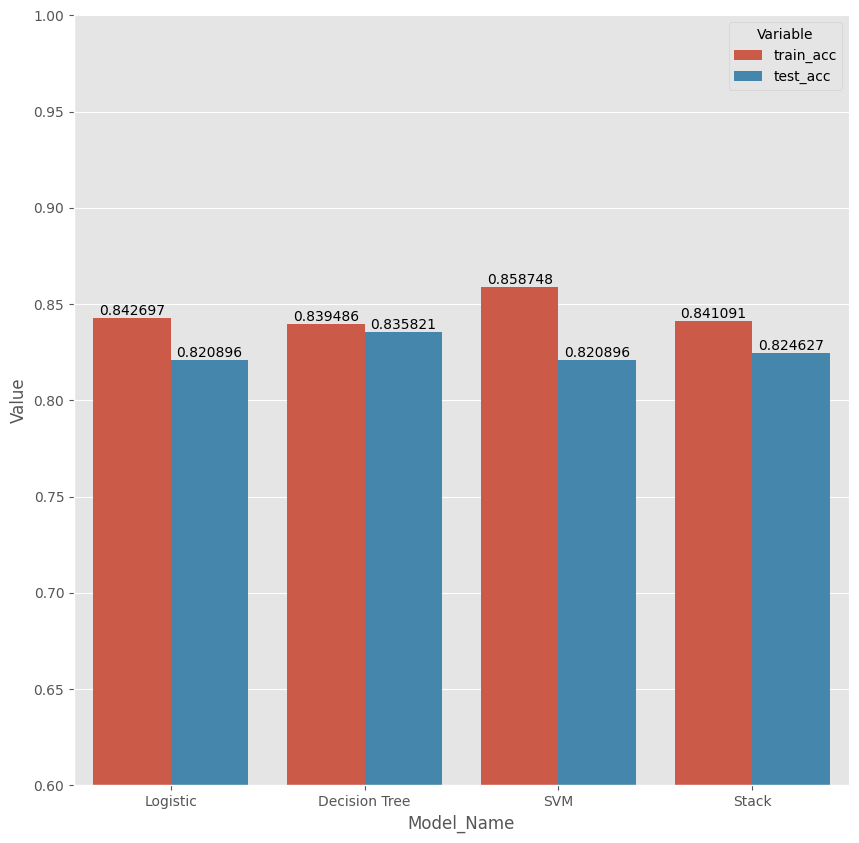

In [135]:
fig, ax1 = plt.subplots(figsize = (10,10))
tidy = acc_df.melt(id_vars='Model_name').rename(columns=str.title)
ax = sns.barplot(x='Model_Name', y='Value', hue='Variable', data=tidy, ax=ax1)
sns.despine(fig)
for i in ax.containers :
    ax.bar_label(i,)
plt.ylim(0.6,1)
plt.show()


### 5. Check - 2) ROC CURVE

> __(1) Logistic Regression, Decision Tree, SVM, Staking Model__

In [136]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

logistic_pred_test = logistic_model.predict_proba(transform_test_x)
decision_pred_test = decision_model.predict_proba(transform_test_x)
svm_pred_test = svm_rbf.predict_proba(transform_test_x)
stack_pred_test = s2_model.predict_proba(S_test)
logistic_fpr, logistic_tpr, _ = roc_curve(y_true=titanic_test_y, y_score=logistic_pred_test[:,
                                                                         1])  # real y & predicted y (based on "Sepal width")
svm_fpr, svm_tpr, _ = roc_curve(y_true=titanic_test_y,
                                y_score=svm_pred_test[:, 1])  # real y & predicted y (based on "Sepal width")
decision_fpr, decision_tpr, _ = roc_curve(y_true=titanic_test_y, y_score=decision_pred_test[:,
                                                                         1])  # real y & predicted y (based on "Sepal width")
stack_fpr, stack_tpr, _ = roc_curve(y_true=titanic_test_y, y_score=stack_pred_test[:,
                                                                         1])  # real y & predicted y (based on "Sepal width")

logistic_roc_auc = auc(logistic_fpr, logistic_tpr)  # AUC 면적의 값 (수치)
svm_roc_auc = auc(svm_fpr, svm_tpr)  # AUC 면적의 값 (수치)
decision_roc_auc = auc(decision_fpr, decision_tpr)  # AUC 면적의 값 (수치)
stack_roc_auc = auc(stack_fpr, stack_tpr)  # AUC 면적의 값 (수치)


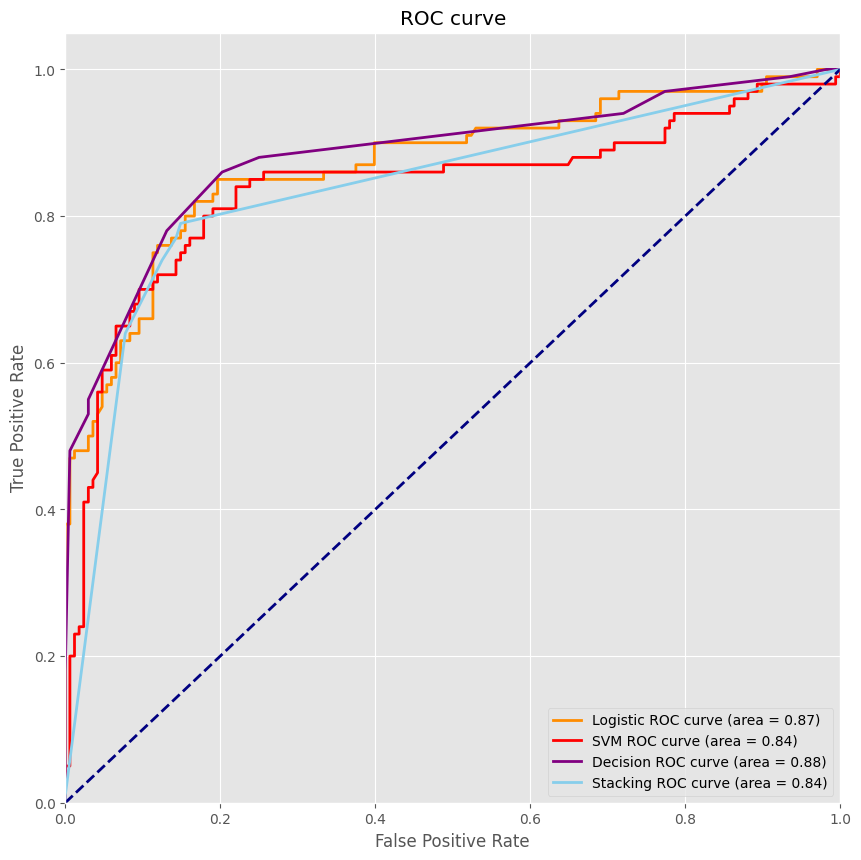

In [137]:
plt.figure(figsize=(10, 10))

plt.plot(logistic_fpr, logistic_tpr, color='darkorange', lw=2,
         label='Logistic ROC curve (area = %0.2f)' % logistic_roc_auc)
plt.plot(svm_fpr, svm_tpr, color='red', lw=2, label='SVM ROC curve (area = %0.2f)' % svm_roc_auc)
plt.plot(decision_fpr, decision_tpr, color='Purple', lw=2, label='Decision ROC curve (area = %0.2f)' % decision_roc_auc)
plt.plot(stack_fpr, stack_tpr, color='SkyBlue', lw=2, label='Stacking ROC curve (area = %0.2f)' % stack_roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")

plt.show()


> __(2) XGBoost__

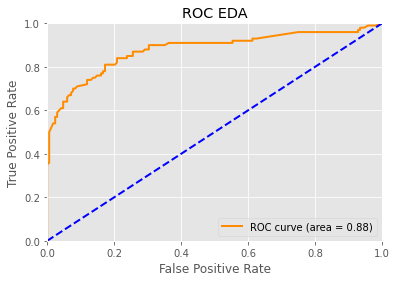

In [212]:
y_pred_prob = model.predict(X_test)

# FPR, TPR, 임계값(thresholds) 계산
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# AUC 값 계산
roc_auc = auc(fpr, tpr)

# ROC Curve EDA
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC EDA')
plt.legend(loc="lower right")
plt.show()


### 5. Check - 3) F1 Score

   __Precision(정밀도), Recall(재현율)__

> $Precision = \frac{TruePositive }{TruePositive + False Positive} $
> $Recall = \frac{TruePositive }{TruePositive + False Negative} $

> $F1score = \frac{2}{\frac{1}{Precision} + \frac{1}{Recall}}$

In [138]:

def calc_f1_scores(models):
    f1_lists = []
    for model in models:
        f1_lists.append(f1_score(titanic_test_y, model.predict(transform_test_x)))
    return f1_lists



In [139]:
pd.DataFrame(data = np.array(calc_f1_scores(used_model) + [f1_score(titanic_test_y,s2_model.predict(S_test))]).reshape(1,-1),
              columns=['Logistic','DecisionTree','svc','Stack_model' ])


,Logistic,DecisionTree,svc,Stack_model
0,0.764706,0.78,0.736264,0.758974


In [1]:
# end-of-file